# **Project - Twitter US Airline Sentiment**
---

## **Background & Context:**

* Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.
</br>

* That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


## **Objective:**

- The goal of this project is to create a classifier capable of listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry. In this case, a sentiment analysis job about the problems of each major U.S. airline.
</br>

-   The model needs to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


## **Data Description:**

#### Twitter data was scraped during the month of February of 2015. The dataset comprises of following information:

- tweet_id                                                           
- airline_sentiment                                               
- airline_sentiment_confidence                               
- negativereason                                                   
- negativereason_confidence                                    
- airline                                                                    
- airline_sentiment_gold                                              
- name     
- negativereason_gold 
- retweet_count
- text
- tweet_coord
- tweet_created
- tweet_location 
- user_timezone


---

<a id="summary_home"></a>
## Table of Contents (TOC)

##### - *[Importing Packages](#import)*

##### - *[Unwrapping Customer Information](#unwrap)*
- *[Data Description](#datadesc)*

##### - *[Data Pre-Processing & Sanity Checks](#preprocess)*
- *[Dropping the Tweet ID column](#)*
- *[Checking for duplicates](#)*
- *[Checking for Uniqueness](#)*
- *[Extracting the Date, Month & Year from the timestamp](#)*
- *[Missing Value analysis](#)*
- *[Observing the values of the columns to observe the pattern and data correctness](#)*

##### - *[Summary of Data Analysis](#dataanalysis1)*

##### - *[EDA Analysis](#EDAAttrAnalysis)*
- *[Insights from Categorical Data](#inCharData)*
- *[Insights from Numerical Data](#inNumber1)*

- *[EDA - Analysis based on Features](#EDAAnalysis)*
    - *[Distribution of Sentiment of Tweets](#)*
    - *[Reasons for Negative tweets](#)*
    - *[Gold Reasons for Negative tweets](#)*
    - *[No. of Characters in Tweet](#)*
    - *[No. of Words in Tweet](#)*
    - *[Distribution of words for each class](#)*
    - *[Tweet distribution by date](#)*
    - *[Most active hour on twitter](#)*
    - *[Timezone of Tweets (Top 10)](#)*
    - *[Location of Tweets (Top 10)](#)*

- *[EDA - Analysis based on Airlines](#EDA-Airlines)*
    - *[Distribution of Tweets among each Airlines](#)*
    - *[Distribution of Sentiment of Tweets across each of the Airlines](#)*
    - *[Reasons for Negative tweets across Airlines](#)*
    - *[Most retweeted Tweet across Airlines](#)*
    - *[Analysis of the Retweets based on Sentiment across Airlines](#)*
    - *[Most common words in the positive, negative & nextural Sentiment tweets - Before Data PreProcessing](#Common-Pre)*
        - *[Positive Tweet Cloud](#)*
    	- *[Negative Tweet Cloud](#)*
    	- *[Neutral Tweet Cloud](#)*

##### - *[Content Preprocessing](#dataPreprocessing)*
   - *[Remove html tags](#)*
   - *[Replace contractions](#)*
   - *[Remove numbers](#)*
   - *[Remove URLs](#)*
   - *[Removal of @Mention](#)*
   - *[Tokenization.](#)*
   - *[Removal of Non Ascii codes](#)*
   - *[Conversion to lowercase](#)*
   - *[Removel of special Characters & Punctuations](#)*
   - *[Remove Stopwords](#)*
   - *[Lemmatized data](#)*
   - *[Most common words in the positive, negative & nextural Sentiment tweets - Post Data Processing](#Common-Post)*
        - *[Positive Tweet Cloud](#)*
    	- *[Negative Tweet Cloud](#)*
    	- *[Neutral Tweet Cloud](#)*
   - *[Dropping Feature columns with too many missing values or with irrelevant information](#)*

##### - *[Model Building](#model)*
- *[Sentiment Analysis using Supervised Learning Methods](#supermodel)*
    - *[Building the model based on CountVectorizer and Random Forest](#Count)*
        - *[Top 40 Features WordCloud](#)*
    - *[Building the model based on Term Frequency(TF) - Inverse Document Frequency(IDF)](#TFIDF)*
        - *[Top 40 Features WordCloud](#)*

- *[Sentiment Analysis using Unsupervised Learning Methods](#supermodel)*
    - *[Building the model based using Text Blob](#textblob)*
    - *[Building the model based using Vader Sentiment](#vader)*
	
##### - *[Summary of the Modeling](#summarymodeling)*

##### - *[Recommendations](#recommendations)*

<a id='import'> </a>

## Importing required Packages: 
*[Click to return to TOC](#summary_home)*

---

In [1]:
!pip install contractions
!pip install wordcloud
import wordcloud

import re, string, unicodedata                                          #Used for Text PreProcessing
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns                                                   # Used for plotting
from collections import Counter                                           # count the key-value pairs in an object
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator           # Used for plotting the wordcloud of a corpus
import nltk                                                               # Used for different task of NLP
from nltk.corpus import stopwords                                         # Used for removal of stop words
import warnings                                                           
warnings.filterwarnings("ignore")
from nltk.stem.porter import PorterStemmer                                #Used for Stemming of words in the corpus

from sklearn import tree

# to split the data into train and test
from sklearn.model_selection import train_test_split
# to build Bagging model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

!pip install textblob
from textblob import TextBlob
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
from nltk.corpus import stopwords

pd.options.display.max_colwidth = 100

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cpaul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cpaul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cpaul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\cpaul\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
tweets=pd.read_csv('../Dataset/Tweets.csv')                             #Importing the data

# same random results every time
np.random.seed(1)
tweets.sample(n=10)

# To copy the data to another object
tweetData = tweets.copy()                                              #Taking a copy of the original data

<a id='unwrap'> </a>

## Unwrapping the Customer Information: 
*[Click to return to TOC](#summary_home)*

---

In [3]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
# Command to understand the total number of data collected
print(
    f"- There are {tweets.shape[0]} row samples and {tweets.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 14640 row samples and 15 attributes of the customer information collected in this dataset.


In [5]:
tweets.head(5)


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                                                                  text  \
0                                                                  @VirginAmerica What @dhepburn said.   
1                             @VirginAmerica plus you've added commercials to the experience... tacky.   
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...   
4                                              @VirginAmerica and it's a really big bad thing about it   

  tweet_coord              tweet_created tweet_location  \
0         NaN  2015-02-24 11:35:52 -0800            NaN   
1         NaN  2015-02-24 11:15:59 -0800            NaN   
2         NaN  2015-02-24 11:15:48 -0800      Lets Play   
3         NaN  2015-02-24 11:15:36 -0800            NaN   
4         NaN  2015-02-24 11:14:45 -0800            NaN   

                user_timezone  
0  Eastern Time (US & Canada)  
1  Pacific Time (US & Canada)  
2  Central Time (US & Canada)  
3  Pacific Time (US & Canada)  
4  Pacific Time (US & Canada)

In [6]:
tweets.tail(5)


tweet_id airline_sentiment  airline_sentiment_confidence  \
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14635                     NaN                     0.0000  American   
14636  Customer Service Issue                     1.0000  American   
14637                     NaN                        NaN  American   
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold             name negativereason_gold  \
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count  \
14635              0   
14636              0   
14637              0   
14638              0   
14639              0   

                                                                                                      text  \
14635                                      @AmericanAir thank you we got on a different flight to Chicago.   
14636  @AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 ...   
14637                                         @AmericanAir Please bring American Airlines to #BlackBerry10   
14638  @AmericanAir you have my money, you change my flight, and don't answer your phones! Any other su...   
14639  @AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us o...   

      tweet_coord              tweet_created tweet_location  \
14635         NaN  2015-02-22 12:01:01 -0800            NaN   
14636         NaN  2015-02-22 11:59:46 -0800          Texas   
14637         NaN  2015-02-22 11:59:15 -0800  Nigeria,lagos   
14638         NaN  2015-02-22 11:59:02 -0800     New Jersey   
14639         NaN  2015-02-22 11:58:51 -0800     dallas, TX   

                    user_timezone  
14635                         NaN  
14636                         NaN  
14637                         NaN  
14638  Eastern Time (US & Canada)  
14639                         NaN

In [7]:
tweets.describe(include="all").T

count unique                         top  \
tweet_id                      14640.0    NaN                         NaN   
airline_sentiment               14640      3                    negative   
airline_sentiment_confidence  14640.0    NaN                         NaN   
negativereason                   9178     10      Customer Service Issue   
negativereason_confidence     10522.0    NaN                         NaN   
airline                         14640      6                      United   
airline_sentiment_gold             40      3                    negative   
name                            14640   7701                 JetBlueNews   
negativereason_gold                32     13      Customer Service Issue   
retweet_count                 14640.0    NaN                         NaN   
text                            14640  14427              @united thanks   
tweet_coord                      1019    832                  [0.0, 0.0]   
tweet_created                   14640  14247   2015-02-24 09:54:34 -0800   
tweet_location                   9907   3081                  Boston, MA   
user_timezone                    9820     85  Eastern Time (US & Canada)   

                              freq                  mean                 std  \
tweet_id                       NaN  569218351767382528.0  779111158481836.75   
airline_sentiment             9178                   NaN                 NaN   
airline_sentiment_confidence   NaN              0.900169             0.16283   
negativereason                2910                   NaN                 NaN   
negativereason_confidence      NaN              0.638298             0.33044   
airline                       3822                   NaN                 NaN   
airline_sentiment_gold          32                   NaN                 NaN   
name                            63                   NaN                 NaN   
negativereason_gold             12                   NaN                 NaN   
retweet_count                  NaN               0.08265            0.745778   
text                             6                   NaN                 NaN   
tweet_coord                    164                   NaN                 NaN   
tweet_created                    5                   NaN                 NaN   
tweet_location                 157                   NaN                 NaN   
user_timezone                 3744                   NaN                 NaN   

                                               min                   25%  \
tweet_id                      567588278875213824.0  568559178101439488.0   
airline_sentiment                              NaN                   NaN   
airline_sentiment_confidence                 0.335                0.6923   
negativereason                                 NaN                   NaN   
negativereason_confidence                      0.0                0.3606   
airline                                        NaN                   NaN   
airline_sentiment_gold                         NaN                   NaN   
name                                           NaN                   NaN   
negativereason_gold                            NaN                   NaN   
retweet_count                                  0.0                   0.0   
text                                           NaN                   NaN   
tweet_coord                                    NaN                   NaN   
tweet_created                                  NaN                   NaN   
tweet_location                                 NaN                   NaN   
user_timezone                                  NaN                   NaN   

                                               50%                   75%  \
tweet_id                      569477857923110912.0  569890473289000960.0   
airline_sentiment                              NaN                   NaN   
airline_sentiment_confidence                   1.0                   1.0   
negativereaso

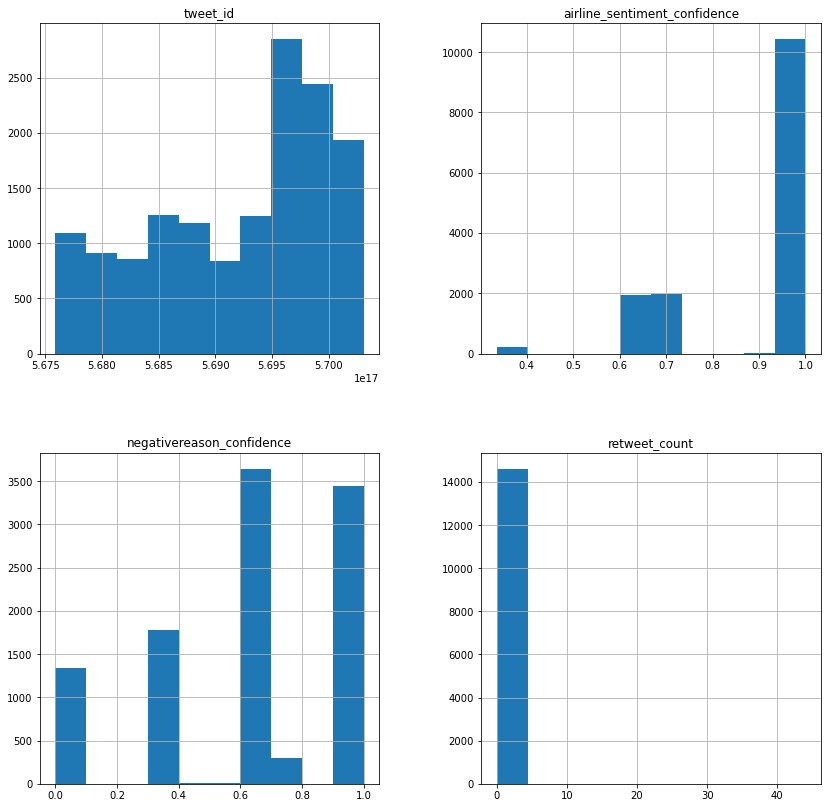

In [8]:
# creating histograms
tweets.hist(figsize=(14, 14))
plt.show()

<a id="datadesc"> </a>

### Data Information:

Based on the high level data values, the following is the understanding of the features in this dataset:

*[Click to return to TOC](#summary_home)*

* tweet_id - Unique ID of the tweets
* airline_sentiment - Provides the feedback sentiment of the airlines in terms of positive, negative & neutral
* airline_sentiment_confidence - % of confidence of the sentiment
* negativereason - Negative feedback categories
* negativereason_confidence - % of confidence of the negative feedback
* airline - Name of the Airlines 
* airline_sentiment_gold - Sentiment of the Gold category airlines
* name - Name of the individual who logged the tweet
* negativereason_gold - Negative feedback categories for Gold category airlines
* retweet_count - # of times the tweet was retweeted
* text - Tweet content
* tweet_coord - Location coordinates of the user who have posted the tweet
* tweet_created - Date of Tweet creation
* tweet_location - Location of the user who have posted the tweet 
* user_timezone - Timezone of the user who have posted the tweet


**Data Description:**

* `tweet_id` - There are 14640 tweets in the dataset
* `airline_sentiment` - There are 3 categories of sentiments provided for each airline. The sentiment "Negative" seems to be the top sentiment compared with others
* `airline_sentiment_confidence` - The sentiment confidence on the airlines has been varying from the range of 33% to 100%. More than 75% of the tweets has a confidence ratio are greater than 69% ratio with a mean of 90%. Almost more than 10K of tweets have a confdence ratio of 90%-100%, while more than 2K of the tweets have a confidence ration between 60%-72%
* `negativereason` - There are 10 unique negative reasons with "Customer Service Issue" being the top (2910 freq) most reason.  
* `negativereason_confidence` - The confidence factor of the negative reasons varies between 0 - 100% with an average of 64%. More than 50% of the tweets has a confidence ration greater than 67%. 
* `airline` - There are 6 airlines considered in this set of tweets. "United" airlines has received more number (# 3822) of tweets. 
* `airline_sentiment_gold` - Among the tweets considered as Gold in the airline sentiments, "Negative" sentiments seems to be the top (# 32 occurences) category
* `name` - The user "JetBlueNews" has tweeted the most (#63 times) among the users
* `negativereason_gold` - Among the tweets considered as Gold in the Negative reasons, "Customer Service Issue" reasons seems to be the top (# 12 occurences) trending category
* `retweet_count` - Most of the tweets have never been retweeted. Among the ones that were retweeted, the maximum time a tweet was retweeted as 44 times
* `text` - The tweet content "@united thanks" was the most number of times tweeted. 
* `tweet_coord` - The tweet coordinates doesnt seem to be properly collected. Will need to do further analysis 
* `tweet_created` - The most tweet received during a particular instant "2015-02-24 09:54:34 -0800" is max of 5 times. 
* `tweet_location` - The users from "Boston, MA" location have tweeted more times
* `user_timezone` - The users from "Eastern Time (US & Canada)" location have tweeted more times


<a id='preprocess'> </a>

## Data Preprocessing & Sanity Checks
*[Click to return to TOC](#summary_home)*

---

### Dropping the Tweet ID column

In [9]:
# Dropping the 'Tweet' columns since its not required
tweets.drop(["tweet_id"], axis=1, inplace=True)

### Checking for Duplicates

In [10]:
# Checking for duplicated rows in the dataset
duplicateSum = tweets.duplicated().sum()
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    tweets.drop_duplicates(inplace=True)
    print(
        f"- There are {str(tweets.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    tweets.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    tweets.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

- There are 36 duplicated row(s) in the dataset
- There are 0 duplicated row(s) in the dataset post cleaning


**Inferences:**

- The duplicate tweets have been removed


### Checking for Uniqueness

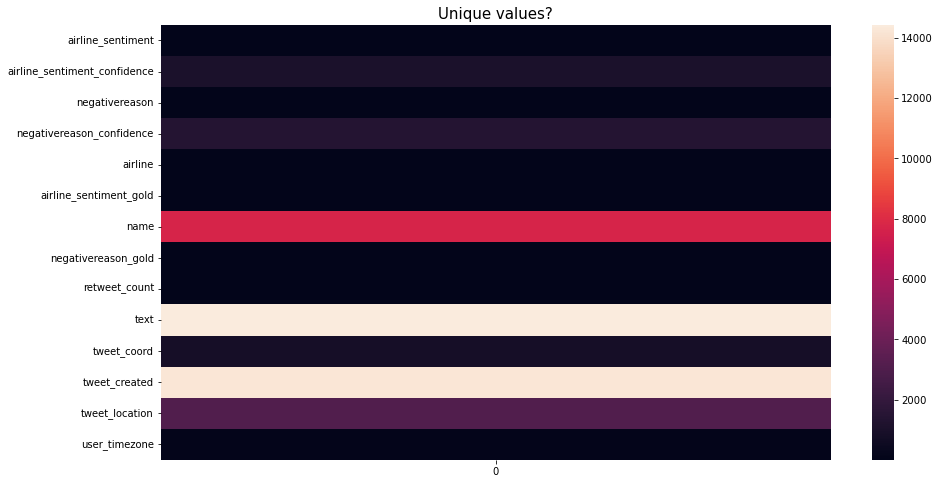

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.DataFrame(tweets.nunique()))                                  #Visualization of unique values using heatmap
plt.title("Unique values?", fontsize = 15)
plt.show()

In [12]:
tweets.nunique()

airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

**Inferences:**

- Except for Tweet ID, text content, created date which has almost no repeated information, the remaining features seems to have a considerable amount of repeat/common data


### Extracting the Date, Month & Year from the timestamp

In [13]:
year=[]
month=[]
date=[]
hour=[]
for x in tweets['tweet_created']:
    year.append(int(x.split("-")[0]))                                          #extraction of year from date column and appending into list
    month.append(int(x.split("-")[1]))                                         #extraction of month from date column and appending into list
    date.append(int(x.split("-")[2].split(" ")[0]))                            #extraction of date of the month from date column and appending into list
    hour.append(int(x.split("-")[2].split(" ")[1].split(":")[0]))              #extraction of hour of that day from date column and appending into list

tweets['year']=year
tweets['month']=month
tweets['dates']=date
tweets['hour']=hour
tweets.head()

airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

   negativereason_confidence         airline airline_sentiment_gold  \
0                        NaN  Virgin America                    NaN   
1                     0.0000  Virgin America                    NaN   
2                        NaN  Virgin America                    NaN   
3                     0.7033  Virgin America                    NaN   
4                     1.0000  Virgin America                    NaN   

         name negativereason_gold  retweet_count  \
0     cairdin                 NaN              0   
1    jnardino                 NaN              0   
2  yvonnalynn                 NaN              0   
3    jnardino                 NaN              0   
4    jnardino                 NaN              0   

                                                                                                  text  \
0                                                                  @VirginAmerica What @dhepburn said.   
1                             @VirginAmerica plus you've added commercials to the experience... tacky.   
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...   
4                                              @VirginAmerica and it's a really big bad thing about it   

  tweet_coord              tweet_created tweet_location  \
0         NaN  2015-02-24 11:35:52 -0800            NaN   
1         NaN  2015-02-24 11:15:59 -0800            NaN   
2         NaN  2015-02-24 11:15:48 -0800      Lets Play   
3         NaN  2015-02-24 11:15:36 -0800            NaN   
4         NaN  2015-02-24 11:14:45 -0800            NaN   

                user_timezone  year  month  dates  hour  
0  Eastern Time (US & Canada)  2015      2     24    11  
1  Pacific Time (US & Canada)  2015      2     24    11  
2  Central Time (US & Canada)  2015      2     24    11  
3  Pacific Time (US & Canada)  2015      2     24    11  
4  Pacific Time (US & Canada)  2015      2     24    11

### Missing Value analysis

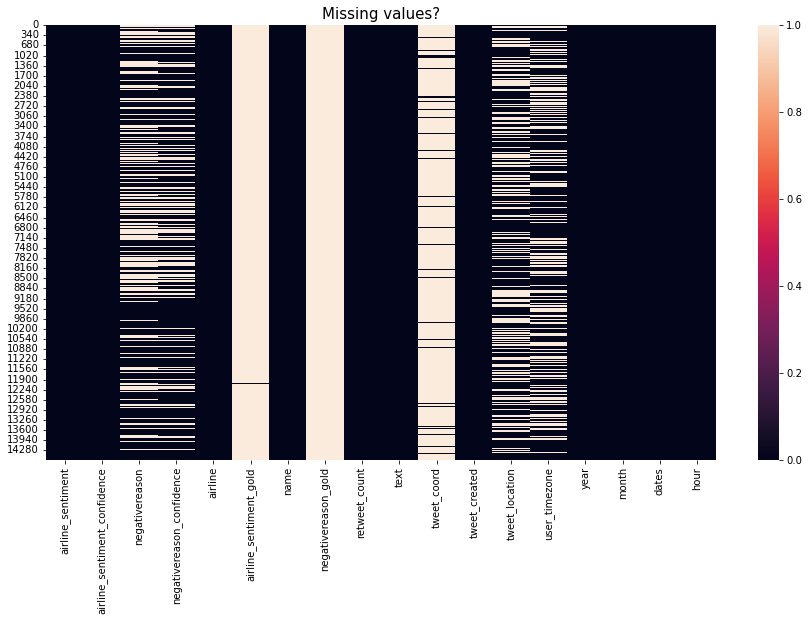

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(tweets.isnull())                                  #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

In [15]:
tweets.isnull().sum()

airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5445
negativereason_confidence        4101
airline                             0
airline_sentiment_gold          14564
name                                0
negativereason_gold             14572
retweet_count                       0
text                                0
tweet_coord                     13589
tweet_created                       0
tweet_location                   4723
user_timezone                    4814
year                                0
month                               0
dates                               0
hour                                0
dtype: int64

In [16]:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)                                                  # Nu of zero in each column
        mis_val = df.isnull().sum()                                                                      # Missing value in each column
        mis_val_percent = 100 * df.isnull().sum() / len(df)                                              # Missing value percent accross column
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)                               # Concatenation of above aoutput
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})                    # Renaming of each coumn
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']     # Column having total of zero value and missing values
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)  # Column having percentage of totalof zero and missing value
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(                                                        # Selecting and sorting those column which have at not a zero value in % of Total Values column
        '% of Total Values', ascending=False).round(1)
        print ("The selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)
        return mz_table

missing_zero_values_table(tweets)

The selected dataframe has 18 columns and 14604 Rows.
There are 7 columns that have missing values.


Zero Values  Missing Values  % of Total Values  \
negativereason_gold                  0           14572               99.8   
airline_sentiment_gold               0           14564               99.7   
tweet_coord                          0           13589               93.0   
negativereason                       0            5445               37.3   
user_timezone                        0            4814               33.0   
tweet_location                       0            4723               32.3   
negativereason_confidence         1344            4101               28.1   

                           Total Zero Missing Values  \
negativereason_gold                            14572   
airline_sentiment_gold                         14564   
tweet_coord                                    13589   
negativereason                                  5445   
user_timezone                                   4814   
tweet_location                                  4723   
negativereason_confidence                       5445   

                           % Total Zero Missing Values Data Type  
negativereason_gold                               99.8    object  
airline_sentiment_gold                            99.7    object  
tweet_coord                                       93.0    object  
negativereason                                    37.3    object  
user_timezone                                     33.0    object  
tweet_location                                    32.3    object  
negativereason_confidence                         37.3   float64

**Inferences**:

- The features `airline_sentiment_gold`, `negativereason_gold`, `tweet_coord` have very high number of missing values. We can probably consider dropping these columns post further analysis
- The features `negativereason`, `negativereason_confidence`,`tweet_location`, `user_timezone` are the other features that are having missing values
- The remaining features have no missing values
</br>

Based on the above plot, we can say as there are 7 columns with missing values

* Negative Reason Gold - Has almost 100% of the data missing
* Airline Sentiment Gold - Has almost 100% of the data missing
* Tweet Coord - Has almost 93% of the data missing
* Negative Reason  - Has almost 37% of the data missing
* Tweet Location - Has almost 32% of the data missing
* User timezone - Has almost 28% of the data missing
* Negative Reason Confidence Factor - Has almost 33% of the data missing


### Observing the values of the columns for patterns and data correctness

In [17]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14604 entries, 0 to 14603
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14604 non-null  object 
 1   airline_sentiment_confidence  14604 non-null  float64
 2   negativereason                9159 non-null   object 
 3   negativereason_confidence     10503 non-null  float64
 4   airline                       14604 non-null  object 
 5   airline_sentiment_gold        40 non-null     object 
 6   name                          14604 non-null  object 
 7   negativereason_gold           32 non-null     object 
 8   retweet_count                 14604 non-null  int64  
 9   text                          14604 non-null  object 
 10  tweet_coord                   1015 non-null   object 
 11  tweet_created                 14604 non-null  object 
 12  tweet_location                9881 non-null   object 
 13  u

In [18]:
tweets.describe(include="all").T

count unique                         top  \
airline_sentiment               14604      3                    negative   
airline_sentiment_confidence  14604.0    NaN                         NaN   
negativereason                   9159     10      Customer Service Issue   
negativereason_confidence     10503.0    NaN                         NaN   
airline                         14604      6                      United   
airline_sentiment_gold             40      3                    negative   
name                            14604   7701                 JetBlueNews   
negativereason_gold                32     13      Customer Service Issue   
retweet_count                 14604.0    NaN                         NaN   
text                            14604  14427              @united thanks   
tweet_coord                      1015    832                  [0.0, 0.0]   
tweet_created                   14604  14247   2015-02-24 09:54:34 -0800   
tweet_location                   9881   3081                  Boston, MA   
user_timezone                    9790     85  Eastern Time (US & Canada)   
year                          14604.0    NaN                         NaN   
month                         14604.0    NaN                         NaN   
dates                         14604.0    NaN                         NaN   
hour                          14604.0    NaN                         NaN   

                              freq       mean       std     min     25%  \
airline_sentiment             9159        NaN       NaN     NaN     NaN   
airline_sentiment_confidence   NaN   0.899923  0.162955   0.335  0.6923   
negativereason                2904        NaN       NaN     NaN     NaN   
negativereason_confidence      NaN   0.637644   0.33038     0.0  0.3605   
airline                       3822        NaN       NaN     NaN     NaN   
airline_sentiment_gold          32        NaN       NaN     NaN     NaN   
name                            63        NaN       NaN     NaN     NaN   
negativereason_gold             12        NaN       NaN     NaN     NaN   
retweet_count                  NaN   0.082786  0.746647     0.0     0.0   
text                             6        NaN       NaN     NaN     NaN   
tweet_coord                    162        NaN       NaN     NaN     NaN   
tweet_created                    5        NaN       NaN     NaN     NaN   
tweet_location                 157        NaN       NaN     NaN     NaN   
user_timezone                 3738        NaN       NaN     NaN     NaN   
year                           NaN     2015.0       0.0  2015.0  2015.0   
month                          NaN        2.0       0.0     2.0     2.0   
dates                          NaN  20.939948  2.168015    16.0    19.0   
hour                           NaN  12.325938  5.311295     0.0     8.0   

                                 50%     75%     max  
airline_sentiment                NaN     NaN     NaN  
airline_sentiment_confidence     1.0     1.0     1.0  
negativereason                   NaN     NaN     NaN  
negativereason_confidence     0.6705     1.0     1.0  
airline                          NaN     NaN     NaN  
airline_sentiment_gold           NaN     NaN     NaN  
name                             NaN     NaN     NaN  
negativereason_gold              NaN     NaN     NaN  
retweet_count                    0.0     0.0    44.0  
text                             NaN     NaN     NaN  
tweet_coord                      NaN     NaN     NaN  
tweet_created                    NaN     NaN     NaN  
tweet_location                   NaN     NaN     NaN  
user_timezone                    NaN     NaN     NaN  
year                          2015.0  2015.0  2015.0  
month                            2.0     2.0     2.0  
dates                           22.0    23.0    24.0  
hour                            12.0    17.0    23.0

In [19]:
# printing the number of occurrences of each unique value in each categorical column
num_to_display = 10
for column in tweets.describe(include="all").columns:
    val_counts = tweets[column].value_counts(dropna=False)  # Kept dropNA to False to see the NA value count as well
    val_countsP = tweets[column].value_counts(dropna=False, normalize=True)  # Kept dropNA to False to see the NA value count as well

    print("Unique values in", column, "are :")
    print(val_counts.iloc[:num_to_display])
    print(" ")

    print(val_countsP.iloc[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    print("-" * 50)
    print(" ")


Unique values in airline_sentiment are :
negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64
 
negative    0.627157
neutral     0.211654
positive    0.161189
Name: airline_sentiment, dtype: float64
--------------------------------------------------
 
Unique values in airline_sentiment_confidence are :
1.0000    10409
0.6667       71
0.6632       35
0.6596       30
0.6559       30
0.6701       29
0.6598       28
0.6842       26
0.6600       26
0.6771       24
Name: airline_sentiment_confidence, dtype: int64
 
1.0000    0.712750
0.6667    0.004862
0.6632    0.002397
0.6596    0.002054
0.6559    0.002054
0.6701    0.001986
0.6598    0.001917
0.6842    0.001780
0.6600    0.001780
0.6771    0.001643
Name: airline_sentiment_confidence, dtype: float64
Only displaying first 10 of 1023 values.
--------------------------------------------------
 
Unique values in negativereason are :
NaN                            5445
Customer Service Issue         2904
Late

NaN                            4814
Eastern Time (US & Canada)     3738
Central Time (US & Canada)     1923
Pacific Time (US & Canada)     1206
Quito                           733
Atlantic Time (Canada)          496
Mountain Time (US & Canada)     366
Arizona                         228
London                          193
Alaska                          108
Name: user_timezone, dtype: int64
 
NaN                            0.329636
Eastern Time (US & Canada)     0.255957
Central Time (US & Canada)     0.131676
Pacific Time (US & Canada)     0.082580
Quito                          0.050192
Atlantic Time (Canada)         0.033963
Mountain Time (US & Canada)    0.025062
Arizona                        0.015612
London                         0.013216
Alaska                         0.007395
Name: user_timezone, dtype: float64
Only displaying first 10 of 86 values.
--------------------------------------------------
 
Unique values in year are :
2015    14604
Name: year, dtype: int64
 
2015   

<a id='dataanalysis1'></a>

### Summary of Data Analysis

*[Click to return to TOC](#summary_home)*

**Data Structure:**

* Twitter data was scraped during the month of February of 2015
* There are 14640 row samples and 15 attributes of information collected in this dataset
* There are float64(2), int64(2), object(11) features in the dataset

**Data Cleaning:**

* Tweet ID attribute is not required and the column was dropped
* There were 36 duplicated row(s) in the dataset which was dropped
* Extracted the Year, Month, Date & Hour from the timestamp

**Data Description:**

* `tweet_id` - There are 14640 tweets in the dataset
* `airline_sentiment` - There are 3 categories of sentiments provided for each airline. The sentiment "Negative" seems to be the top sentiment compared with others
* `airline_sentiment_confidence` - The sentiment confidence on the airlines has been varying from the range of 33% to 100%. More than 75% of the tweets has a confidence ratio are greater than 69% ratio with a mean of 90%. Almost more than 10K of tweets have a confdence ratio of 90%-100%, while more than 2K of the tweets have a confidence ration between 60%-72%
* `negativereason` - There are 10 unique negative reasons with "Customer Service Issue" being the top (2910 freq) most reason.  
* `negativereason_confidence` - The confidence factor of the negative reasons varies between 0 - 100% with an average of 64%. More than 50% of the tweets has a confidence ration greater than 67%. 
* `airline` - There are 6 airlines considered in this set of tweets. "United" airlines has received more number (# 3822) of tweets. 
* `airline_sentiment_gold` - Among the tweets considered as Gold in the airline sentiments, "Negative" sentiments seems to be the top (# 32 occurences) category
* `name` - The user "JetBlueNews" has tweeted the most (#63 times) among the users
* `negativereason_gold` - Among the tweets considered as Gold in the Negative reasons, "Customer Service Issue" reasons seems to be the top (# 12 occurences) trending category
* `retweet_count` - Most of the tweets have never been retweeted. Among the ones that were retweeted, the maximum time a tweet was retweeted as 44 times
* `text` - The tweet content "@united thanks" was the most number of times tweeted. 
* `tweet_coord` - The tweet coordinates doesnt seem to be properly collected. Will need to do further analysis 
* `tweet_created` - The most tweet received during a particular instant "2015-02-24 09:54:34 -0800" is max of 5 times. 
* `tweet_location` - The users from "Boston, MA" location have tweeted more times
* `user_timezone` - The users from "Eastern Time (US & Canada)" location have tweeted more times

**Data Observations:**

Based on the data information:

* `airline_sentiment` - There are 3 category of sentiments - Negative, Neutral & Positive with Negative being the top followed by Neutral tweets
* `airline_sentiment_confidence` - Almost 10K of the tweets have a 100% confidence factor, followed by 67% confidence from 71 tweets
* `negativereason` - This features has 11 different reasons documented as negative comments. Most of this feature data is NaN followed by "Customer Service Issue" to be the highest reasons, followed by "Late Flights"
* `negativereason_confidence` - This feature ranges from 0 - 100%. Most of the confidence factor is either 0 or 100% with almost 28% of the tweets without a confidence factor associated
* `airline` - There are 6 airlines data that are being considered for this classificiation. "United" airlines has received more tweets, followed by "US Airways" & "American"
* `airline_sentiment_gold ` - There are 3 category of sentiments - Negative, Neutral & Positive, but most of the data as no/missing value
* `name` - Names of the persons who have tweeted. There are around 7701 unique users with the users "JetBlueNews" & "kbosspotter" topping with more tweets
* `negativereason_gold` - This features has 14 different reasons documented as negative comments. Most of this feature data is NaN followed by "Customer Service Issue" to be the highest reasons
* `retweet_count` - The retweet ranges from 0 to a max of 44 times, with 18 unique values. Most of the tweets were not retweeted, followed by at least one tweet
* `text` - There are almost 14427 tweet descriptions. 
* `tweet_coord` - Most of the tweet coord are NaN. We see more tweets from the coordinate - "[40.64656067, -73.78334045]"
* `tweet_location` - Most number of tweets were received from "Boston, MA", followed by "New York, NY".
* `user_timezone` - Most number of tweets were received from "Eastern Time (US & Canada)", followed by "Central Time (US & Canada)".
* `Year` - All the tweets were received in the year of 2015.
* `Month` - All the tweets were received in the month of Feb.
* `Date` - More tweets were logged on 22nd & 23rd of Feb. 
* `Hour` - More tweets were received during the hour of 9-11.


---

### Common Functions

In [20]:
category_columnNames = tweets.describe(include=["category", "object"]).columns
category_columnNames

Index(['airline_sentiment', 'negativereason', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold', 'text',
       'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone'],
      dtype='object')

In [21]:
number_columnNames = (
    tweets.describe(include=["int64", "float64"]).columns.tolist())
number_columnNames

['airline_sentiment_confidence',
 'negativereason_confidence',
 'retweet_count',
 'year',
 'month',
 'dates',
 'hour']

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, hueCol=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 7))

    plt.xticks(rotation=90, fontsize=15)

    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        hue=hueCol,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )
        # annotate the percentage

    plt.show()  # show the plot

In [23]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True,).sort_values(
        by=sorter, ascending=False
    )
    print("-" * 30, " Volume ", "-" * 30)
    print(tab1)

    tab1 = pd.crosstab(
        data[predictor], data[target], margins=True, normalize="index"
    ).sort_values(by=sorter, ascending=False)
    print("-" * 30, " Percentage % ", "-" * 30)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [24]:
# Creating a common function to draw a Boxplot & a Histogram for each of the analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):

    y_test_pred = model.predict(predictors)
    y_test_pred_classes = np.argmax(y_test_pred,axis=1)
    
    normal_y_test = np.argmax(target,axis=1)

    # Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
    confusion_matrix = cm.confusion_matrix(normal_y_test,y_test_pred_classes)
    f, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(
        confusion_matrix,
        annot=True,
        linewidths=.4,
        fmt="d",
        square=True,
        ax=ax
    )
    plt.show()

    acc = accuracy_score(normal_y_test, y_test_pred_classes)
    recall = recall_score(normal_y_test, y_test_pred_classes, average='weighted')  # to compute Recall
    precision = precision_score(normal_y_test, y_test_pred_classes, average='weighted')  # to compute Precision
    f1 = f1_score(normal_y_test, y_test_pred_classes, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [26]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]  # Probability answer.
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(3, 3)

    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [27]:
def show_wordcloud(dFrame, title):
    text = ' '.join(dFrame['text'].astype(str).tolist())
    
    fig_wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

<a id='EDAAttrAnalysis'> </a>

## EDA Analysis - Analyzing respective attributes to understand the data pattern
*[Click to return to TOC](#summary_home)*

---

In [28]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14604 entries, 0 to 14603
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14604 non-null  object 
 1   airline_sentiment_confidence  14604 non-null  float64
 2   negativereason                9159 non-null   object 
 3   negativereason_confidence     10503 non-null  float64
 4   airline                       14604 non-null  object 
 5   airline_sentiment_gold        40 non-null     object 
 6   name                          14604 non-null  object 
 7   negativereason_gold           32 non-null     object 
 8   retweet_count                 14604 non-null  int64  
 9   text                          14604 non-null  object 
 10  tweet_coord                   1015 non-null   object 
 11  tweet_created                 14604 non-null  object 
 12  tweet_location                9881 non-null   object 
 13  u

In [29]:
# Summary of data
tweets.describe(include="all").T

count unique                         top  \
airline_sentiment               14604      3                    negative   
airline_sentiment_confidence  14604.0    NaN                         NaN   
negativereason                   9159     10      Customer Service Issue   
negativereason_confidence     10503.0    NaN                         NaN   
airline                         14604      6                      United   
airline_sentiment_gold             40      3                    negative   
name                            14604   7701                 JetBlueNews   
negativereason_gold                32     13      Customer Service Issue   
retweet_count                 14604.0    NaN                         NaN   
text                            14604  14427              @united thanks   
tweet_coord                      1015    832                  [0.0, 0.0]   
tweet_created                   14604  14247   2015-02-24 09:54:34 -0800   
tweet_location                   9881   3081                  Boston, MA   
user_timezone                    9790     85  Eastern Time (US & Canada)   
year                          14604.0    NaN                         NaN   
month                         14604.0    NaN                         NaN   
dates                         14604.0    NaN                         NaN   
hour                          14604.0    NaN                         NaN   

                              freq       mean       std     min     25%  \
airline_sentiment             9159        NaN       NaN     NaN     NaN   
airline_sentiment_confidence   NaN   0.899923  0.162955   0.335  0.6923   
negativereason                2904        NaN       NaN     NaN     NaN   
negativereason_confidence      NaN   0.637644   0.33038     0.0  0.3605   
airline                       3822        NaN       NaN     NaN     NaN   
airline_sentiment_gold          32        NaN       NaN     NaN     NaN   
name                            63        NaN       NaN     NaN     NaN   
negativereason_gold             12        NaN       NaN     NaN     NaN   
retweet_count                  NaN   0.082786  0.746647     0.0     0.0   
text                             6        NaN       NaN     NaN     NaN   
tweet_coord                    162        NaN       NaN     NaN     NaN   
tweet_created                    5        NaN       NaN     NaN     NaN   
tweet_location                 157        NaN       NaN     NaN     NaN   
user_timezone                 3738        NaN       NaN     NaN     NaN   
year                           NaN     2015.0       0.0  2015.0  2015.0   
month                          NaN        2.0       0.0     2.0     2.0   
dates                          NaN  20.939948  2.168015    16.0    19.0   
hour                           NaN  12.325938  5.311295     0.0     8.0   

                                 50%     75%     max  
airline_sentiment                NaN     NaN     NaN  
airline_sentiment_confidence     1.0     1.0     1.0  
negativereason                   NaN     NaN     NaN  
negativereason_confidence     0.6705     1.0     1.0  
airline                          NaN     NaN     NaN  
airline_sentiment_gold           NaN     NaN     NaN  
name                             NaN     NaN     NaN  
negativereason_gold              NaN     NaN     NaN  
retweet_count                    0.0     0.0    44.0  
text                             NaN     NaN     NaN  
tweet_coord                      NaN     NaN     NaN  
tweet_created                    NaN     NaN     NaN  
tweet_location                   NaN     NaN     NaN  
user_timezone                    NaN     NaN     NaN  
year                          2015.0  2015.0  2015.0  
month                            2.0     2.0     2.0  
dates                           22.0    23.0    24.0  
hour                            12.0    17.0    23.0

### Analyzing the count and percentage of Categorical attributes using a bar chart

Unique values in airline_sentiment are :
negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64


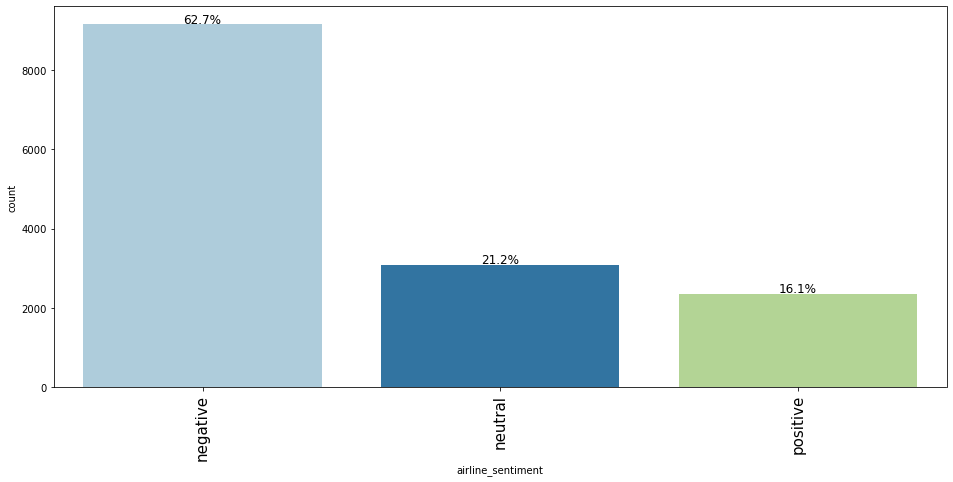

--------------------------------------------------
 
Unique values in negativereason are :
NaN                            5445
Customer Service Issue         2904
Late Flight                    1660
Can't Tell                     1190
Cancelled Flight                843
Lost Luggage                    721
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     480
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


<Figure size 432x288 with 0 Axes>

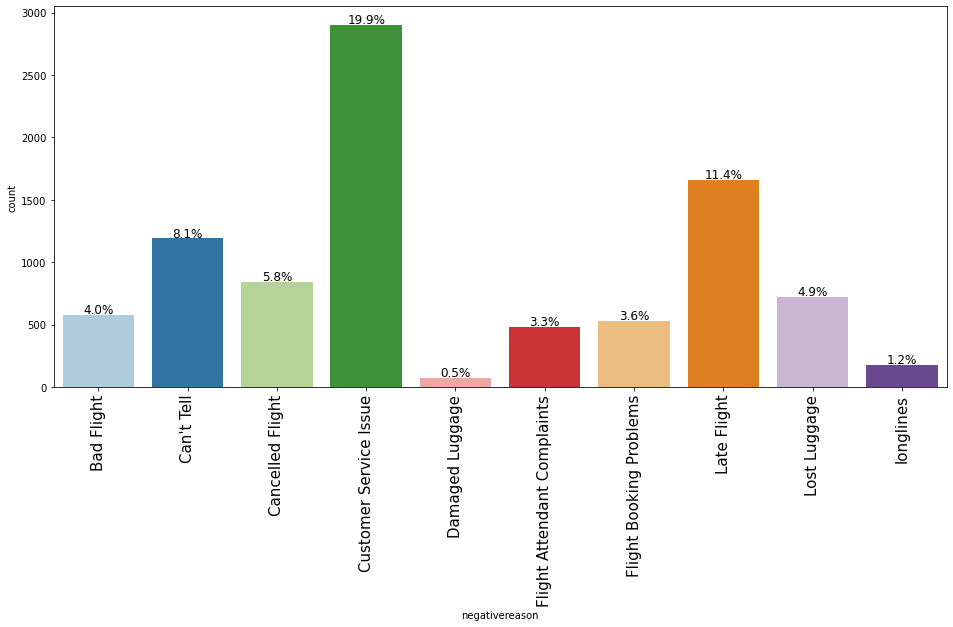

--------------------------------------------------
 
Unique values in airline are :
United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


<Figure size 432x288 with 0 Axes>

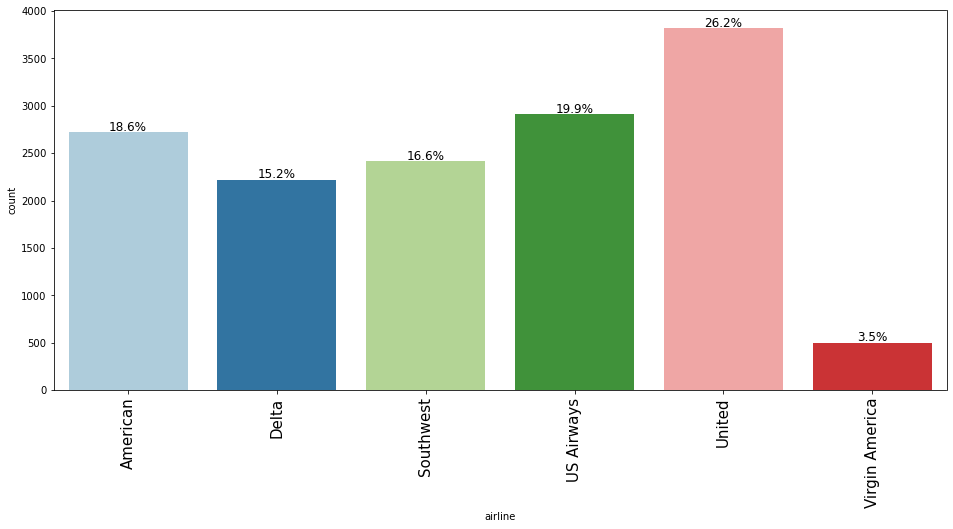

--------------------------------------------------
 
Unique values in airline_sentiment_gold are :
NaN         14564
negative       32
positive        5
neutral         3
Name: airline_sentiment_gold, dtype: int64


<Figure size 432x288 with 0 Axes>

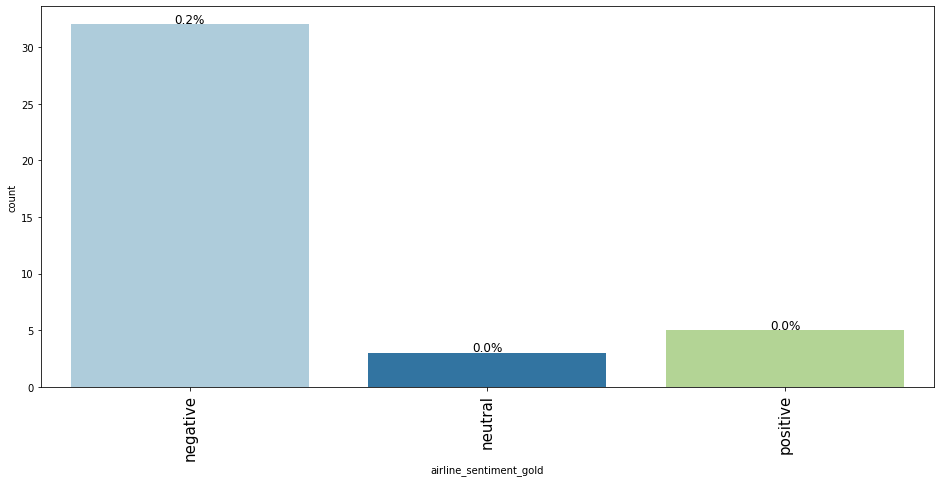

--------------------------------------------------
 
Unique values in name are :
JetBlueNews        63
kbosspotter        32
_mhertz            29
otisday            28
throthra           27
rossj987           23
weezerandburnie    23
MeeestarCoke       22
GREATNESSEOA       22
scoobydoo9749      21
jasemccarty        20
flemmingerin       19
ElmiraBudMan       19
georgetietjen      19
thomashoward88     18
Name: name, dtype: int64
Only displaying first 15 of 7701 values.


<Figure size 432x288 with 0 Axes>

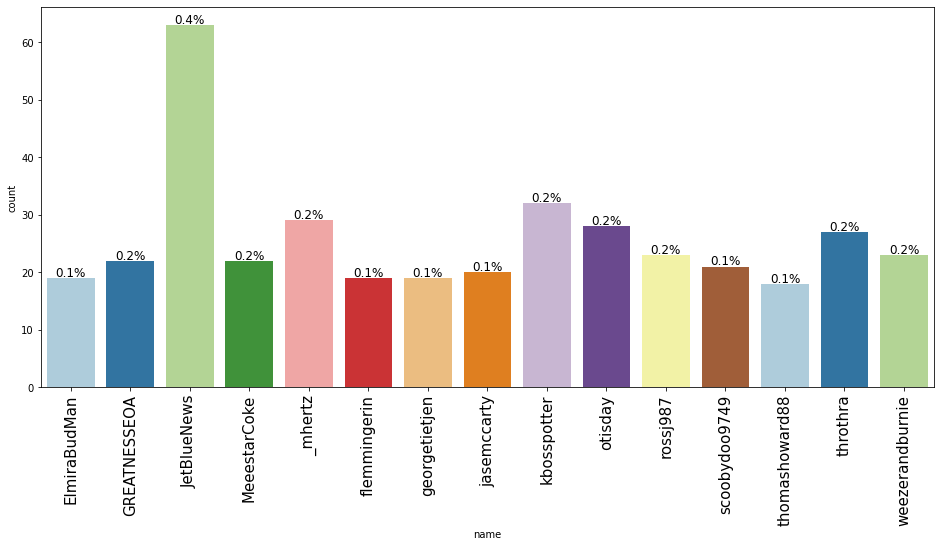

--------------------------------------------------
 
Unique values in negativereason_gold are :
NaN                                         14572
Customer Service Issue                         12
Late Flight                                     4
Can't Tell                                      3
Cancelled Flight                                3
Cancelled Flight\nCustomer Service Issue        2
Late Flight\nFlight Attendant Complaints        1
Late Flight\nLost Luggage                       1
Bad Flight                                      1
Lost Luggage\nDamaged Luggage                   1
Late Flight\nCancelled Flight                   1
Flight Attendant Complaints                     1
Customer Service Issue\nLost Luggage            1
Customer Service Issue\nCan't Tell              1
Name: negativereason_gold, dtype: int64


<Figure size 432x288 with 0 Axes>

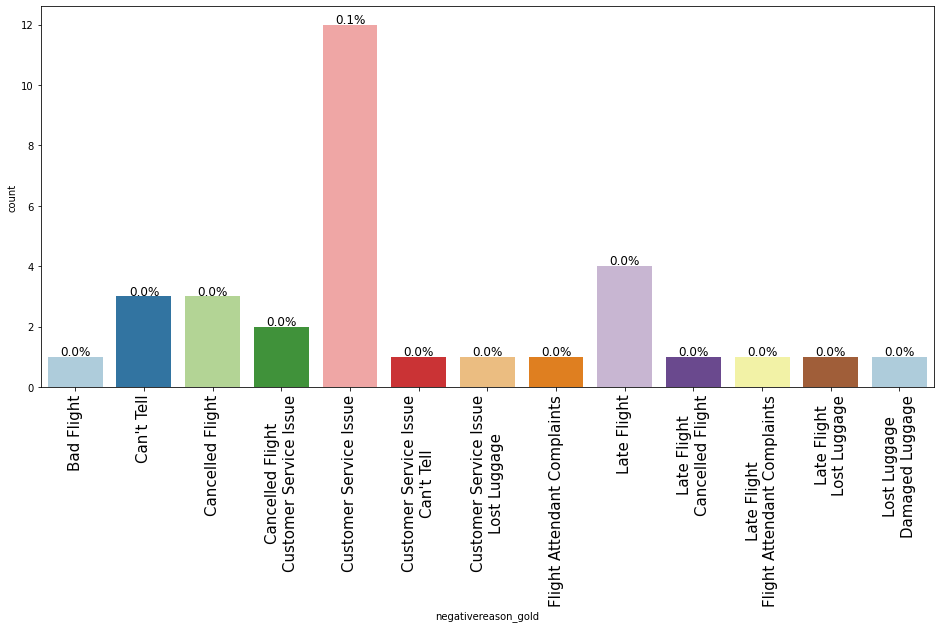

--------------------------------------------------
 
Unique values in text are :
@united thanks                                                   6
@SouthwestAir sent                                               5
@AmericanAir thanks                                              5
@JetBlue thanks!                                                 5
@united thank you!                                               4
@AmericanAir thank you!                                          4
@united thank you                                                3
@USAirways thank you                                             3
@SouthwestAir Thank you!                                         3
@USAirways YOU ARE THE BEST!!! FOLLOW ME PLEASE;)🙏🙏🙏✌️✌️✌️🙏🙏🙏    3
@united Thanks!                                                  3
@USAirways thanks                                                3
@SouthwestAir thank you!                                         3
@AmericanAir thanks!                            

<Figure size 432x288 with 0 Axes>

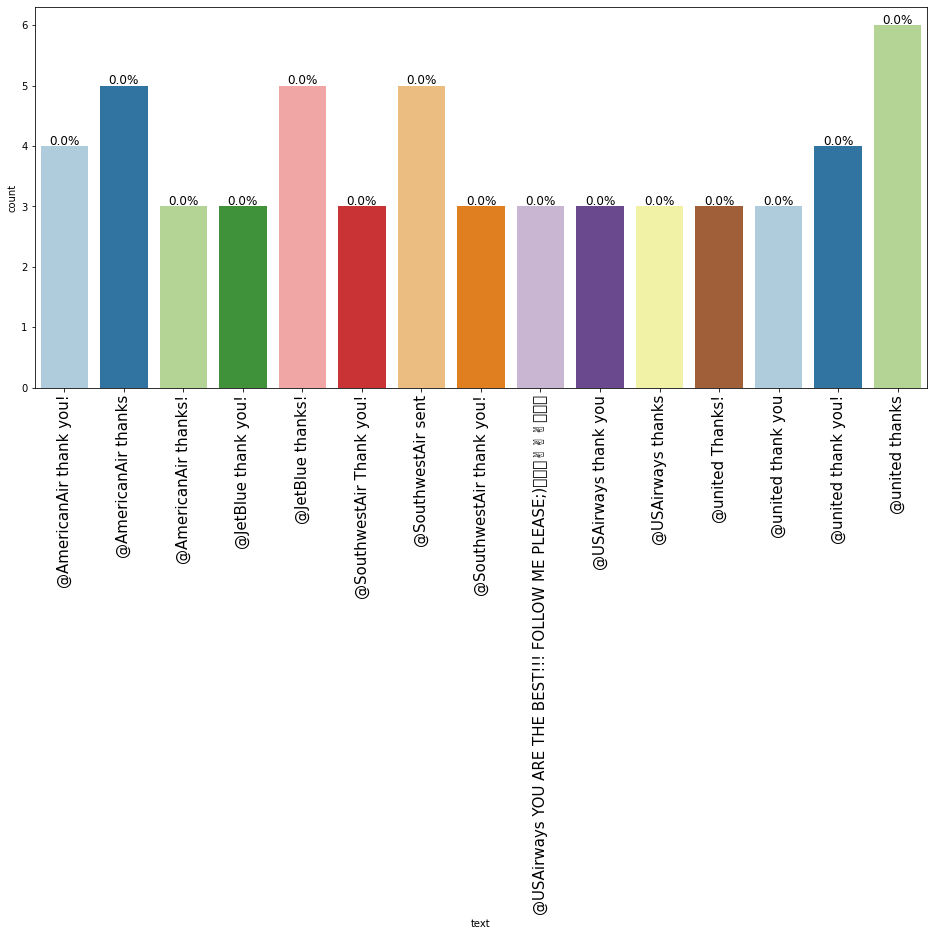

--------------------------------------------------
 
Unique values in tweet_coord are :
NaN                             13589
[0.0, 0.0]                        162
[40.64656067, -73.78334045]         6
[40.64646912, -73.79133606]         3
[32.91792297, -97.00367737]         3
[35.22643463, -80.93879965]         2
[40.69002464, -73.91638072]         2
[37.62006843, -122.38822083]        2
[40.68996177, -73.91640136]         2
[34.0213466, -118.45229268]         2
[33.75539049, -116.36196163]        2
[33.75348859, -116.36209633]        2
[39.1766101, -76.6700606]           2
[40.69017276, -73.91646118]         2
[37.99311597, -84.52114659]         2
Name: tweet_coord, dtype: int64
Only displaying first 15 of 833 values.


<Figure size 432x288 with 0 Axes>

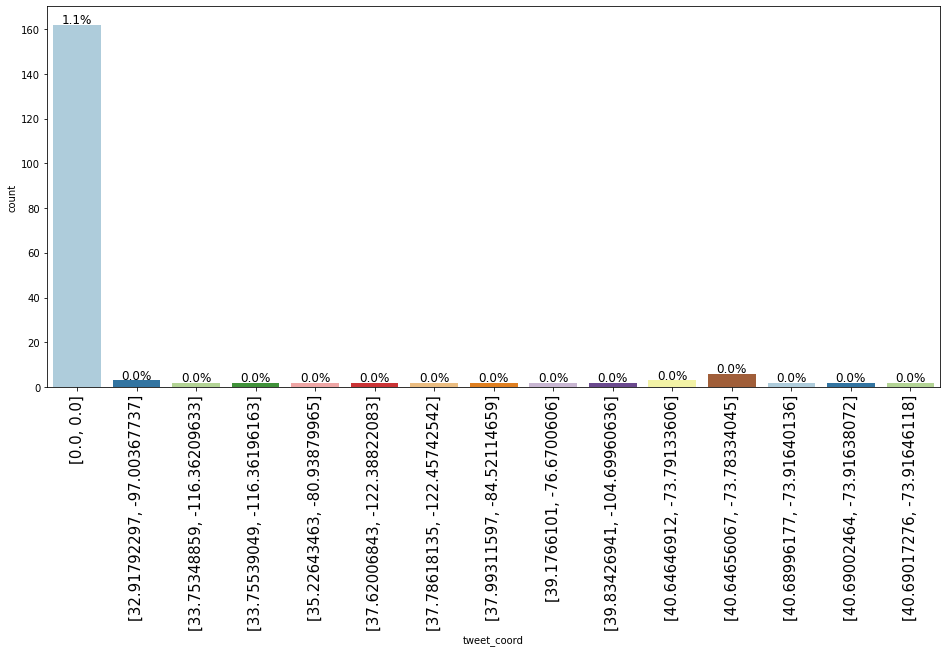

--------------------------------------------------
 
Unique values in tweet_created are :
2015-02-24 09:54:34 -0800    5
2015-02-24 11:43:05 -0800    4
2015-02-23 14:18:58 -0800    3
2015-02-24 11:32:49 -0800    3
2015-02-23 06:57:24 -0800    3
2015-02-23 10:58:58 -0800    3
2015-02-24 11:38:11 -0800    3
2015-02-24 10:01:50 -0800    3
2015-02-23 15:25:46 -0800    3
2015-02-24 11:38:47 -0800    3
2015-02-24 09:14:01 -0800    3
2015-02-22 16:41:42 -0800    2
2015-02-22 12:55:22 -0800    2
2015-02-19 10:42:04 -0800    2
2015-02-24 09:02:36 -0800    2
Name: tweet_created, dtype: int64
Only displaying first 15 of 14247 values.


<Figure size 432x288 with 0 Axes>

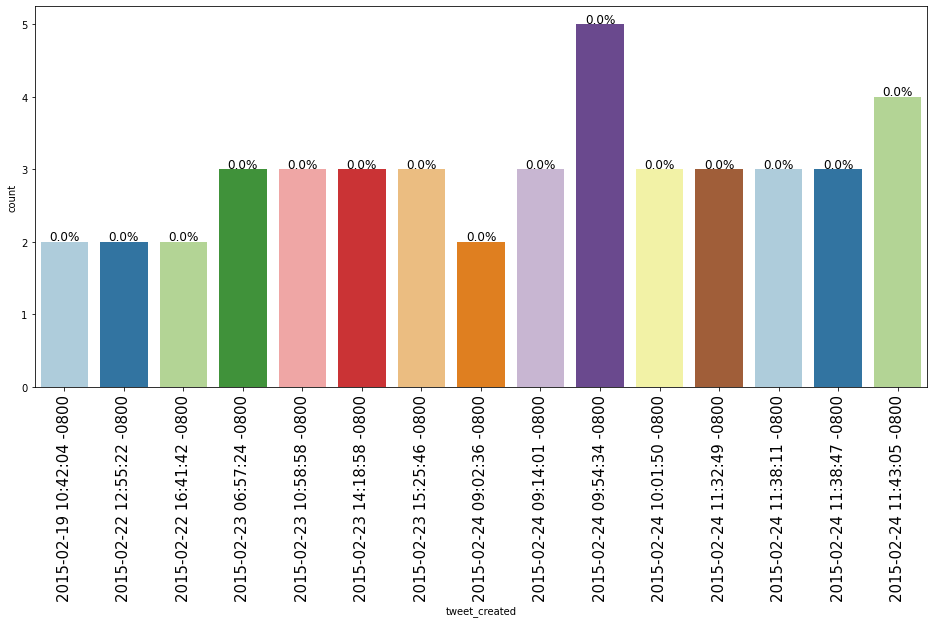

--------------------------------------------------
 
Unique values in tweet_location are :
NaN                  4723
Boston, MA            157
New York, NY          156
Washington, DC        148
New York              127
USA                   125
Chicago               104
New York City          96
Los Angeles, CA        96
NYC                    95
San Francisco, CA      91
San Francisco          86
Chicago, IL            81
Brooklyn, NY           66
Austin, TX             64
Name: tweet_location, dtype: int64
Only displaying first 15 of 3082 values.


<Figure size 432x288 with 0 Axes>

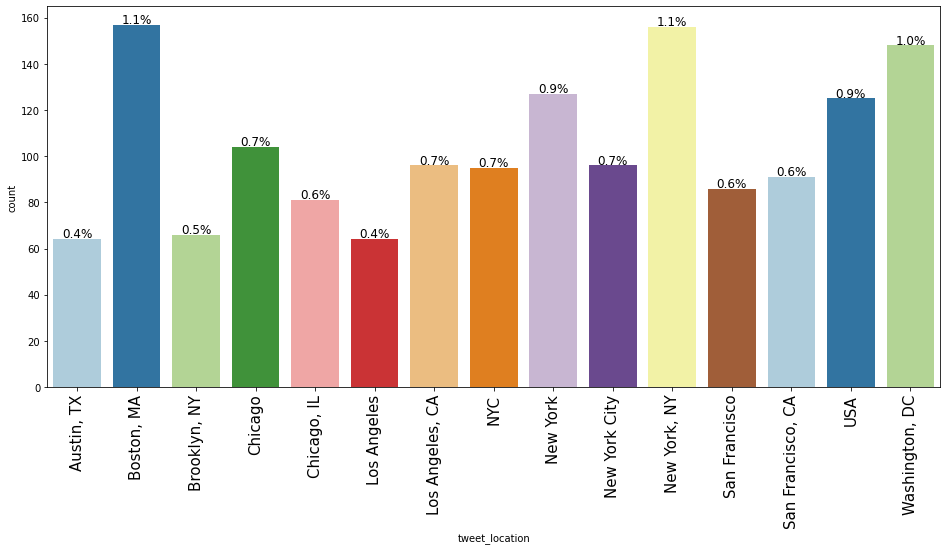

--------------------------------------------------
 
Unique values in user_timezone are :
NaN                            4814
Eastern Time (US & Canada)     3738
Central Time (US & Canada)     1923
Pacific Time (US & Canada)     1206
Quito                           733
Atlantic Time (Canada)          496
Mountain Time (US & Canada)     366
Arizona                         228
London                          193
Alaska                          108
Sydney                          107
Hawaii                          104
Amsterdam                        74
America/Chicago                  37
Indiana (East)                   26
Name: user_timezone, dtype: int64
Only displaying first 15 of 86 values.


<Figure size 432x288 with 0 Axes>

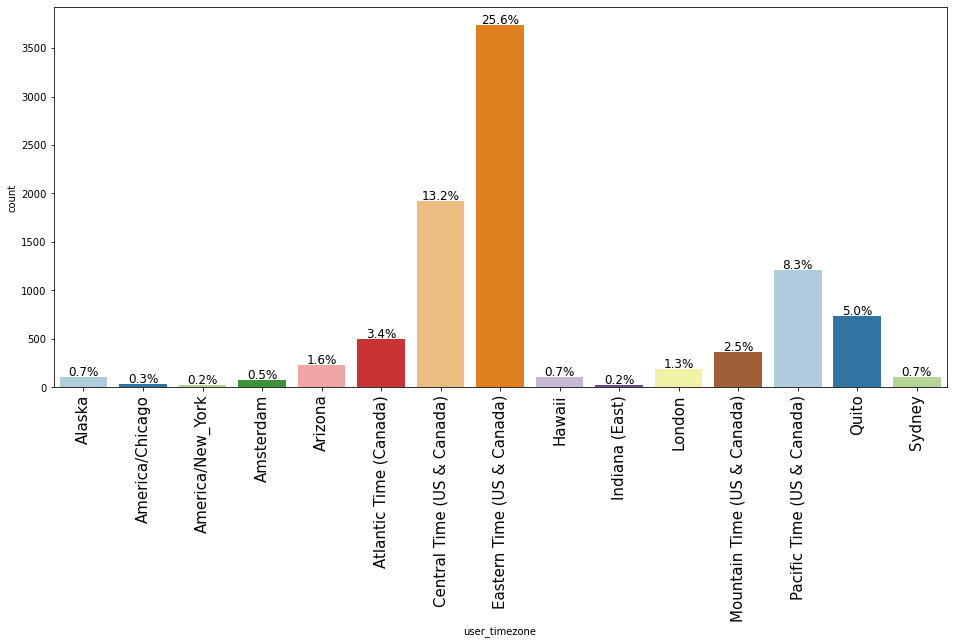

--------------------------------------------------
 


<Figure size 432x288 with 0 Axes>

In [30]:
# printing the number of occurrences of each unique value in each categorical column
num_to_display = 15
for column in category_columnNames:
    val_counts = tweets[column].value_counts(dropna=False)  # Kept dropNA to False to see the NA value count as well
    val_countsP = tweets[column].value_counts(dropna=False, normalize=True)
    print("Unique values in", column, "are :")
    print(val_counts[:num_to_display])
    # print(val_countsP[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")

    labeled_barplot(tweets, column, perc=True, n=15)

    plt.tight_layout()

    print("-" * 50)
    print(" ")


<a id='inCharData'> </a>

### Insights from Categorical Data
*[Click to return to TOC](#summary_home)*


**Observations:**

* 62% of the tweets have a Negative sentiment, while 21% have a neutral sentiment. Only 16% of the tweets are Positive sentiments
* 20% of the tweets have reported "Customer Service Issue" as the the top negative reason, followed by "Late Flights" (11%) & "Cancelled Flights" (6%), "Lost Luggage" (5%)
* United airlines has received more tweets 26% followed by 20% for US airways & 19% for American airlines
* From the data received from the "airline_sentiment_gold" feature, we can see Negative sentiments to be the most as well
* The Customer with name "JetBlueNews" has tweeted the most followed by "kbosspotter"
* From the data received from the "negativereason_gold" feature, we can see "Customer Service Issue" to be the top negative reasons
* 1.1% of the tweets were received from Boston, MA location which is the most, followed by New York, NY.
* 25.6% of the tweets were received from Eastern Time (US & Canada) location which is the most, followed by Central Time (US & Canada).

### Analyzing the Numerical attributes using Histogram and Box Plots

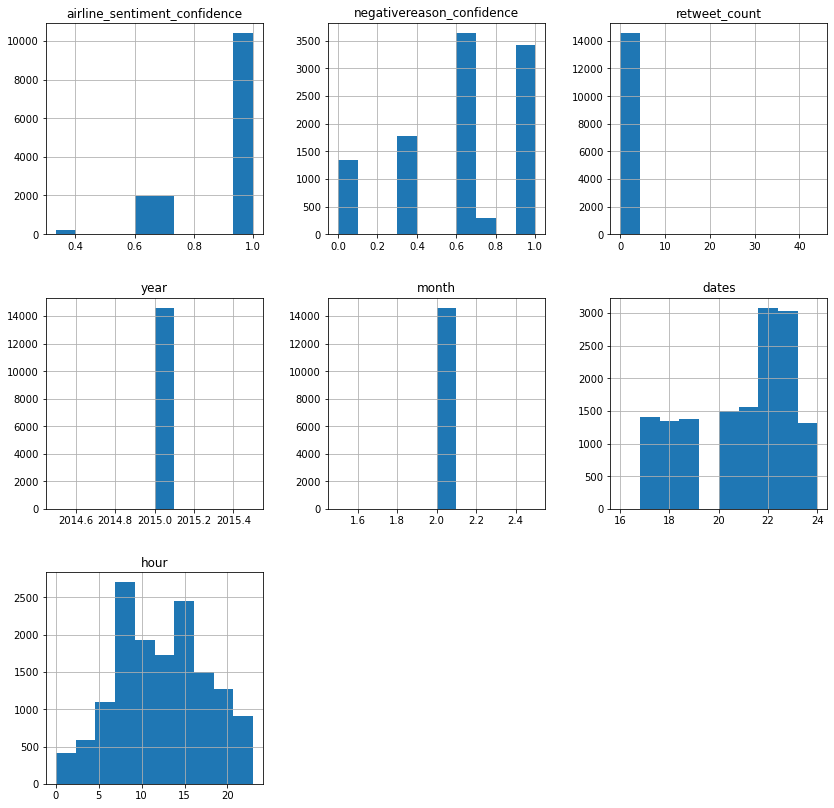

In [31]:
# creating histograms
tweets.hist(figsize=(14, 14))
plt.show()

In [32]:
# Summary of numeric data
tweets.describe().T

count         mean       std       min  \
airline_sentiment_confidence  14604.0     0.899923  0.162955     0.335   
negativereason_confidence     10503.0     0.637644  0.330380     0.000   
retweet_count                 14604.0     0.082786  0.746647     0.000   
year                          14604.0  2015.000000  0.000000  2015.000   
month                         14604.0     2.000000  0.000000     2.000   
dates                         14604.0    20.939948  2.168015    16.000   
hour                          14604.0    12.325938  5.311295     0.000   

                                    25%        50%     75%     max  
airline_sentiment_confidence     0.6923     1.0000     1.0     1.0  
negativereason_confidence        0.3605     0.6705     1.0     1.0  
retweet_count                    0.0000     0.0000     0.0    44.0  
year                          2015.0000  2015.0000  2015.0  2015.0  
month                            2.0000     2.0000     2.0     2.0  
dates                           19.0000    22.0000    23.0    24.0  
hour                             8.0000    12.0000    17.0    23.0

<a id='inNumber1'> </a>

### Insights from Numerical Data

*[Click to return to TOC](#summary_home)*


**Observations:**

* airline_sentiment_confidence ranges from 33% to 100% with an average of 90% confidence. More than 75% of the tweets have more than 69% confidence and more than 50% of tweets have 100% confidence ratio
* negativereason_confidence has most within the range of 60% - 80%, followed by 95%-100% confidence. 
* There has not been any significant retweets and the max retweet was 44 times for a tweet
* The data was collected only for the year of 2015 and for the month of Feb
* The tweets were posted between 16th & 24th of Feb with more tweets post 22-24th Feb
* The tweets were posted during all times across 24 hour of the clock, with 50% of tweets post 12 noon
  

<a id='EDAAnalysis'> </a>

## EDA - Analysis based on respective Features
*[Click to return to TOC](#summary_home)*

---

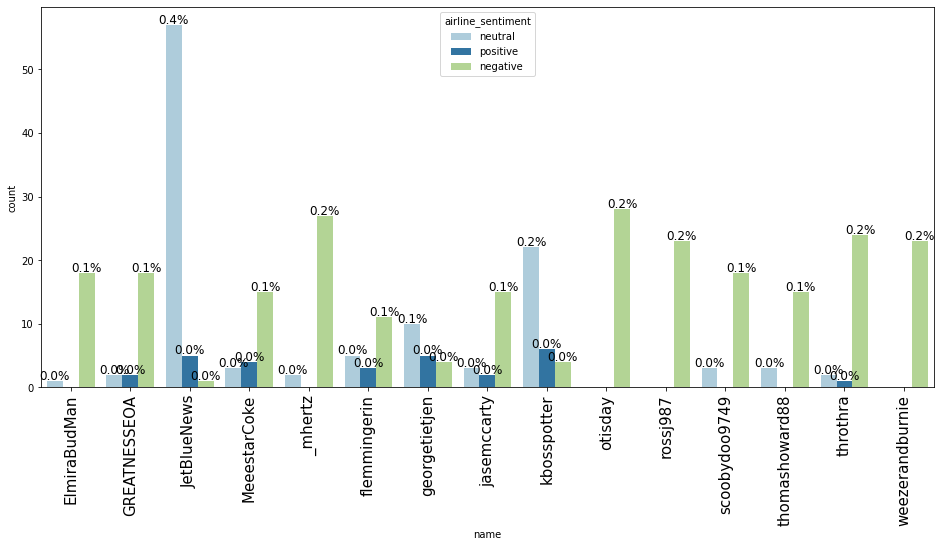

<Figure size 432x288 with 0 Axes>

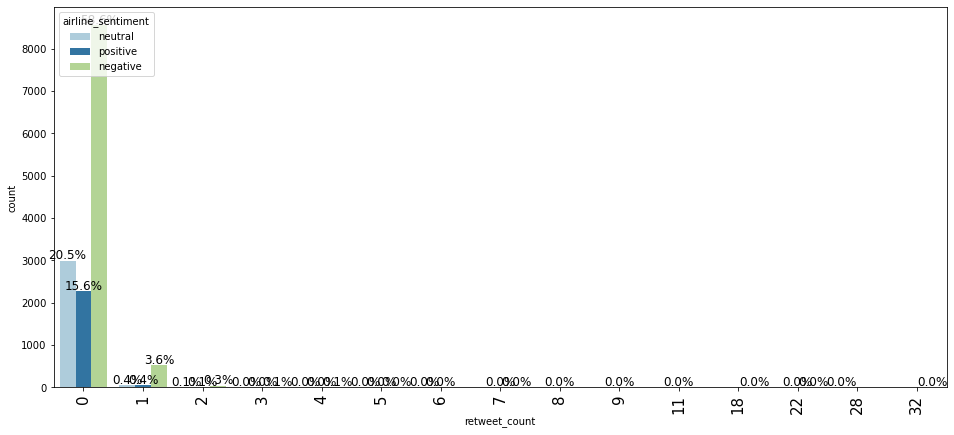

<Figure size 432x288 with 0 Axes>

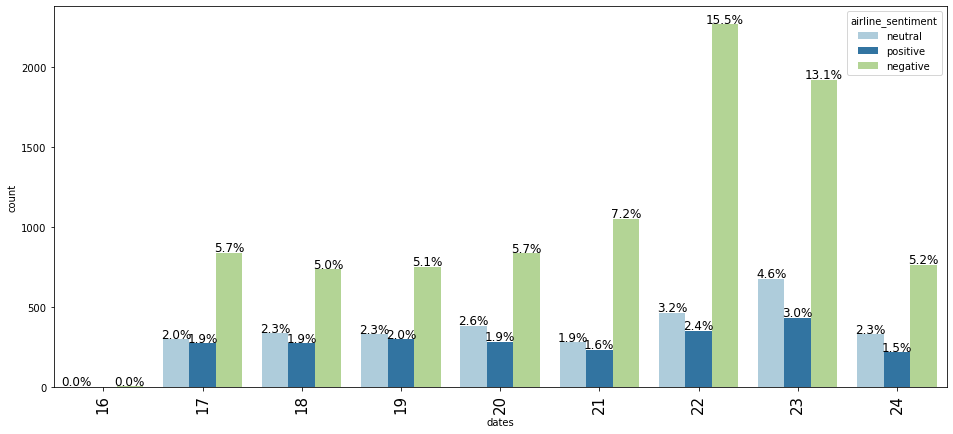

<Figure size 432x288 with 0 Axes>

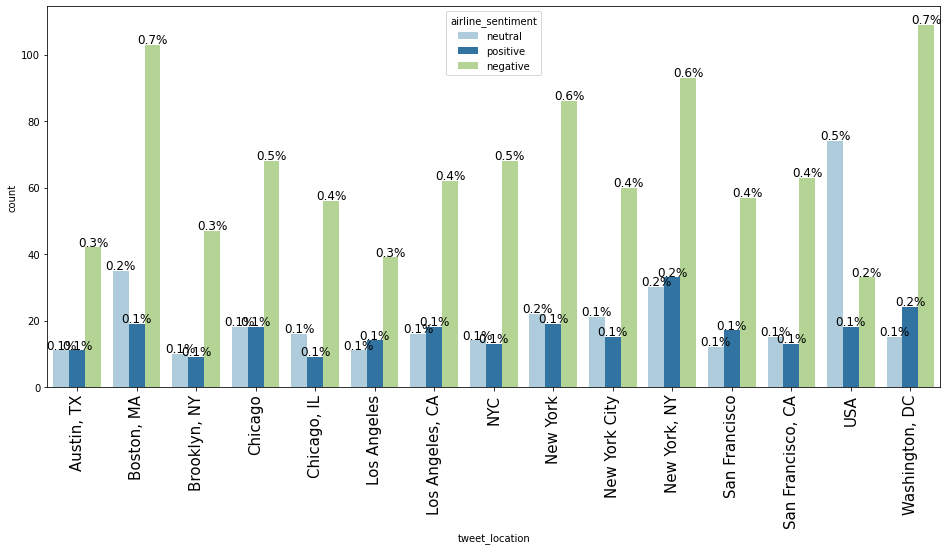

<Figure size 432x288 with 0 Axes>

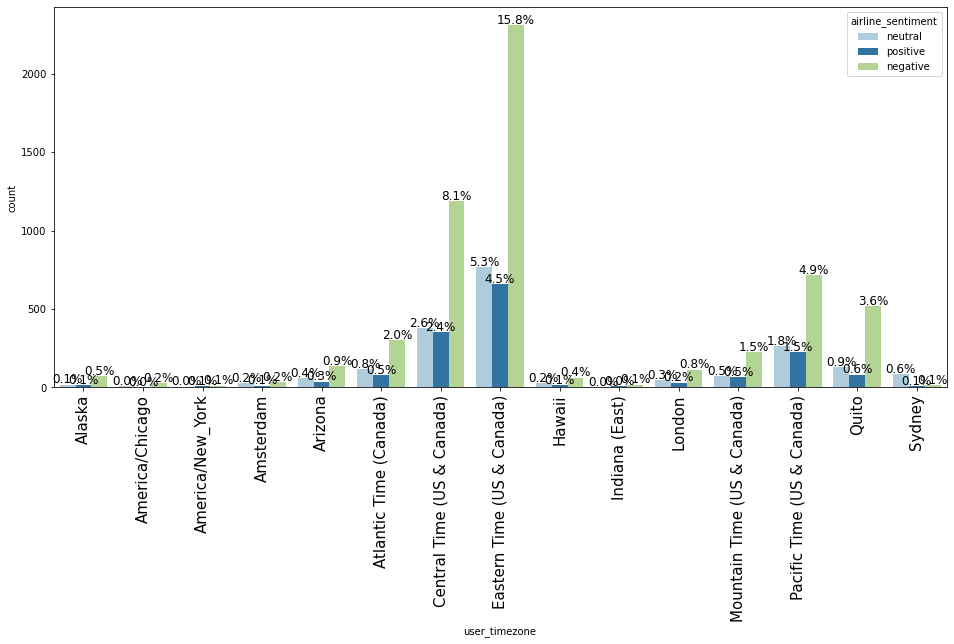

<Figure size 432x288 with 0 Axes>

In [33]:
catnumber_cols = tweets[
    [
        "name",
        "retweet_count",
        "dates",
        "tweet_location",
        "user_timezone",
    ]
].columns.tolist()

# Creating a function to display the values of the attributes against the chart
for i, cols in zip(range(len(catnumber_cols)), catnumber_cols):
    labeled_barplot(tweets, cols, perc=True, n=15, hueCol="airline_sentiment")
    plt.tight_layout()


### Distribution of Sentiment of Tweets

# of Sentiment of Tweets for each Airlines
negative    9159
neutral     3091
positive    2354
Name: airline_sentiment, dtype: int64


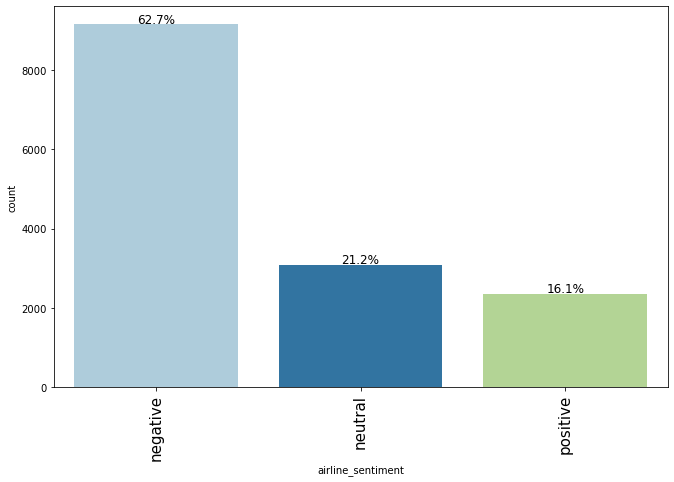

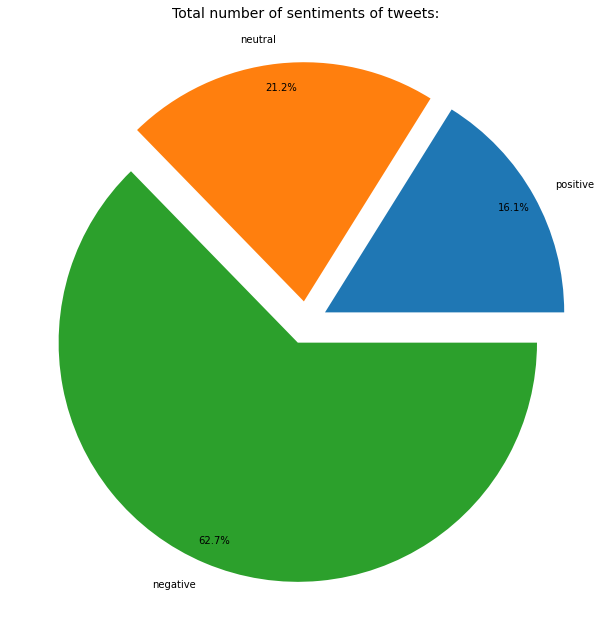

In [34]:
print("# of Sentiment of Tweets for each Airlines")
print(tweets["airline_sentiment"].value_counts(dropna=False))
labeled_barplot(tweets, "airline_sentiment", perc=True, n=10);

Category=tweets['airline_sentiment'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*Category.count(), labels=Category.keys(), pctdistance=0.9)
plt.title("Total number of sentiments of tweets:", fontsize=14);


**Inferences:**

    - 62.7% of the tweets are of Negative sentiments, followed by 21% of Neutral tweets 


### Reasons for Negative tweets

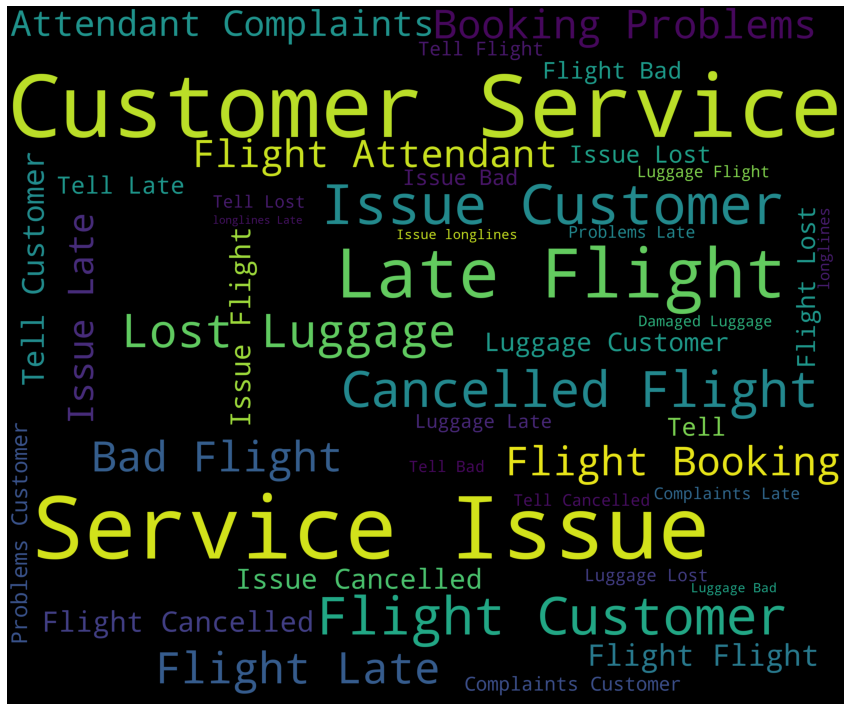

In [35]:
words = ' '.join(tweets['negativereason'].astype(str).tolist())
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word != 'nan'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(15, 20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Reasons for Negative Tweets


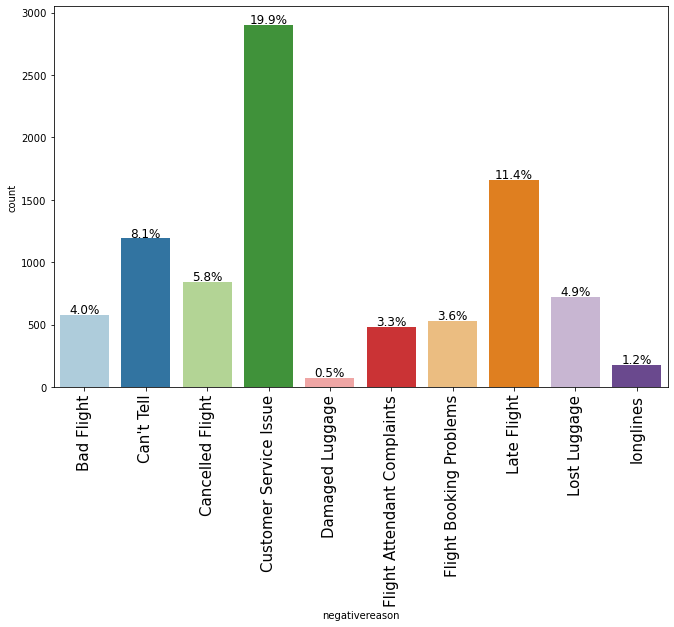

In [36]:
print('Reasons for Negative Tweets')
labeled_barplot(tweets, "negativereason", perc=True, n=10);

**Inferences:**

* 20% of the tweets have reported "Customer Service Issue" has the top reasons
* 11.4% of the tweets have report "Late Flights" & 8% of users have tweeted that they cannot tell
* Most of the Negative reasons looks like Customer Dissatisfaction with the way the service is provided and flights being operated (delays, cancellation, lost baggage, bad flight). 

### Gold Reasons for Negative tweets

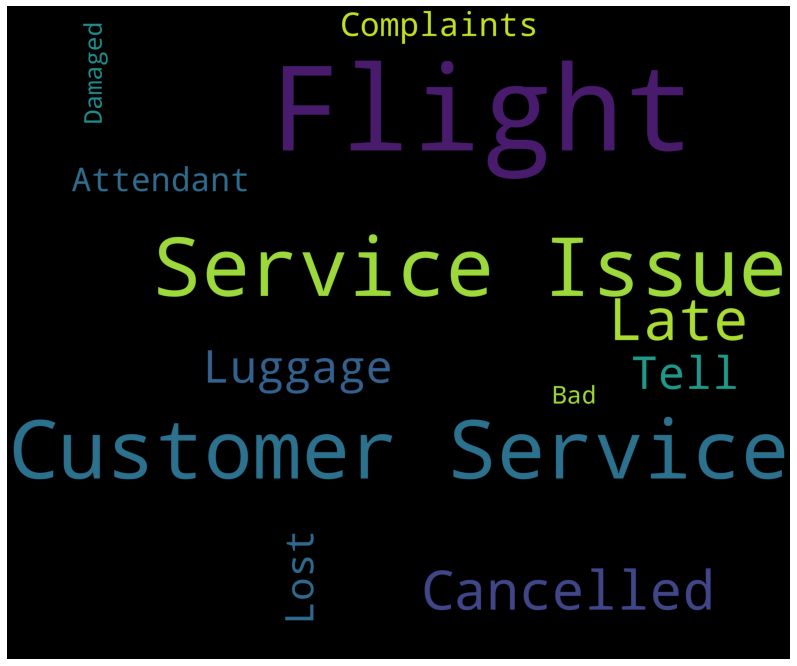

In [37]:
words = ' '.join(tweets["negativereason_gold"].astype(str).tolist())
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                                and word != 'nan'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(20, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Inferences:**

* On reviewing the Gold reasons, at a high level we can see that Customer Service, Flight delays, Lost/Damaged Luggage, Cancelled Flights are some of the primary reasons for the negative tweets

### No. of Characters in Tweet

Text(0.5, 1.0, 'Negative sentiment tweet')

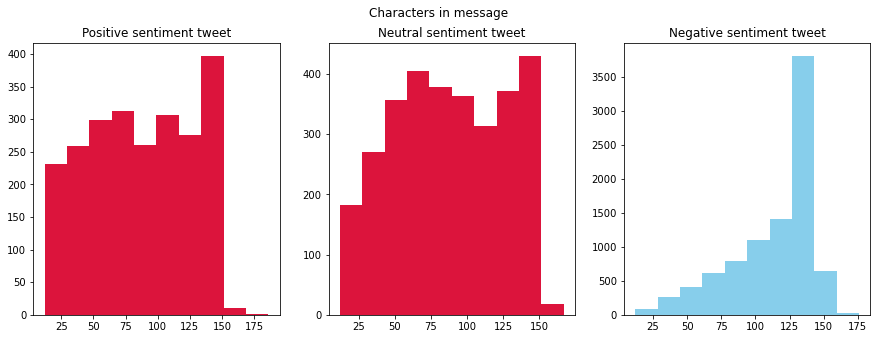

In [38]:
#Number of characters in tweets
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Characters in message')

tweet_len = tweets[tweets['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = tweets[tweets['airline_sentiment']=='neutral']['text'].str.len()
ax2.hist(tweet_len,color='crimson')
ax2.set_title('Neutral sentiment tweet')
tweet_len = tweets[tweets['airline_sentiment']=='negative']['text'].str.len()
ax3.hist(tweet_len,color='skyblue')
ax3.set_title('Negative sentiment tweet')



**Inferences:**

    - Positve sentiment tweets have very less words than Negative sentiments. 
    - There is no substantial difference between positive and neutral sentiments tweet with respect to the length of characters used in the tweet. The Negative tweets have more characters which is expected since more tweeting would have been done to report their concerns


### No. of Words in Tweet

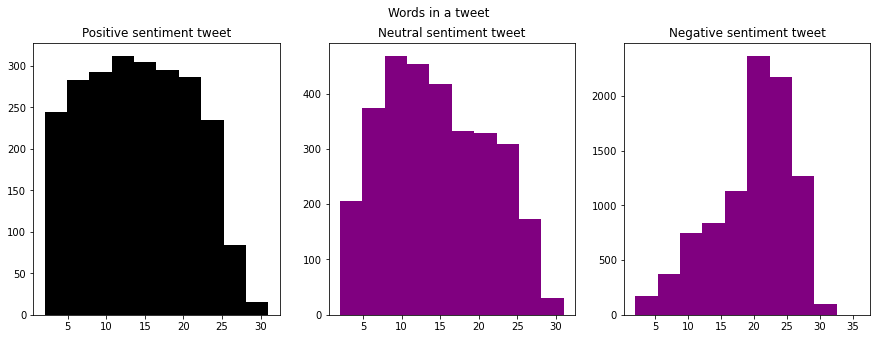

In [39]:
#Number of words in a tweet
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))
fig.suptitle('Words in a tweet')

tweet_len = tweets[tweets['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len, color='black');
ax1.set_title('Positive sentiment tweet');

tweet_len = tweets[tweets['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='purple');
ax2.set_title('Neutral sentiment tweet');

tweet_len = tweets[tweets['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='purple');
ax3.set_title('Negative sentiment tweet');


**Inferences:**

    - Positve sentiment tweets have very less words than Negative sentiments. 
    - There is no substantial difference between positive and neutral sentiments tweet with respect to the number of workds used in the tweet. The Negative tweets have more characters which is expected since more tweeting would have been done to report their concerns

### **Distribution of words for each class**

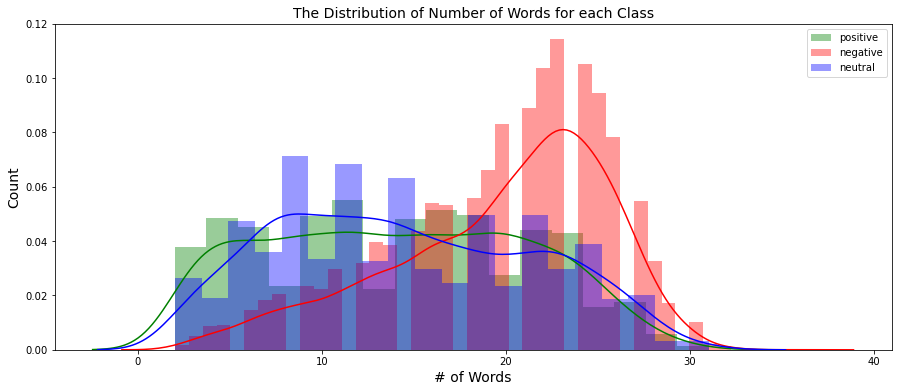

In [40]:
#get the distribution of words for each class
fig = plt.figure(figsize = (15, 6))
sns.distplot(tweets[tweets['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x)), color='g', label = 'positive')
sns.distplot(tweets[tweets['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x)), color='r', label = 'negative')
sns.distplot( tweets[tweets['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x)), color='b', label = 'neutral')
plt.legend(loc='best')
plt.xlabel('# of Words', size = 14)
plt.ylabel('Count', size = 14)
plt.title('The Distribution of Number of Words for each Class', fontsize = 14)
plt.show()

**Inferences:**

    - As we see above, the number of words in positive and neutral tweets are almost the same while the negative tweets are of a longer lenght. The plot is close to normal distribution

### Tweet distribution by date

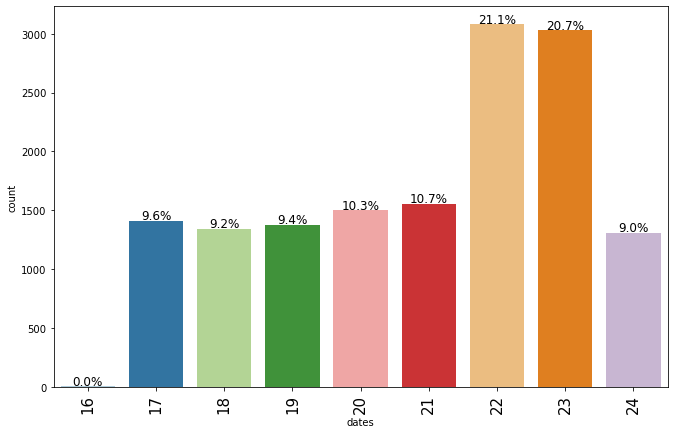

In [41]:
labeled_barplot(tweets, "dates", perc=True, n=10);

**Inferences:**

    - There are more tweets during 22nd & 23rd of Feb. Probably there was a lot of activity in the airline industry which cased the peak in tweets
    - For the remaining days, the volume of tweets seems to be uniform

### Most active hour on twitter

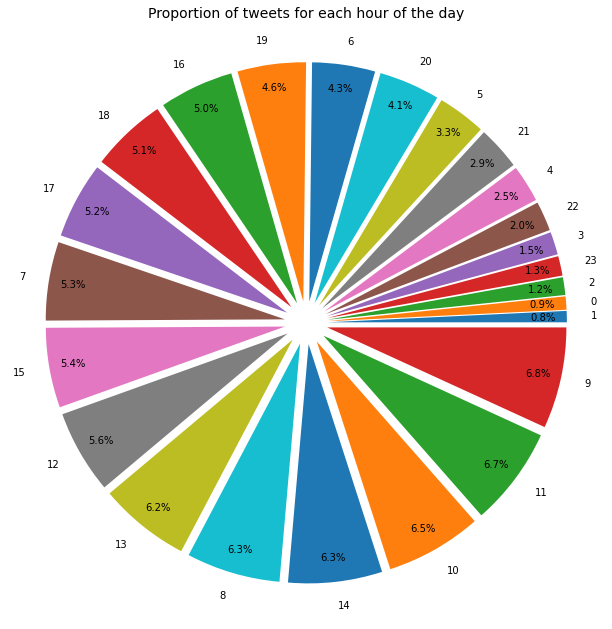

In [42]:
#Using matplotlib
Category=tweets['hour'].value_counts().sort_values()
pie, ax = plt.subplots(figsize=[20,11])
labels = Category.keys()
plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*24, labels=labels, pctdistance=0.9)
plt.title("Proportion of tweets for each hour of the day", fontsize=14);


**Inferences:**

    - Significant tweets are between 7:00 to 20:00 hour of the day at the most, with most tweets during the hours of 9-11am
    - Tweets are less during the night post 20:00 hours and midnight 

### Timezone of Tweets (Top 10)

In [43]:
# take the user timezone based on no of tweets
dt = tweets['user_timezone'].value_counts().reset_index()  
dt.columns = ['user_timezone', 'count']
dt = dt.sort_values(['count'],ascending=False)[:50] #top 50 places
dt.head()


user_timezone  count
0  Eastern Time (US & Canada)   3738
1  Central Time (US & Canada)   1923
2  Pacific Time (US & Canada)   1206
3                       Quito    733
4      Atlantic Time (Canada)    496

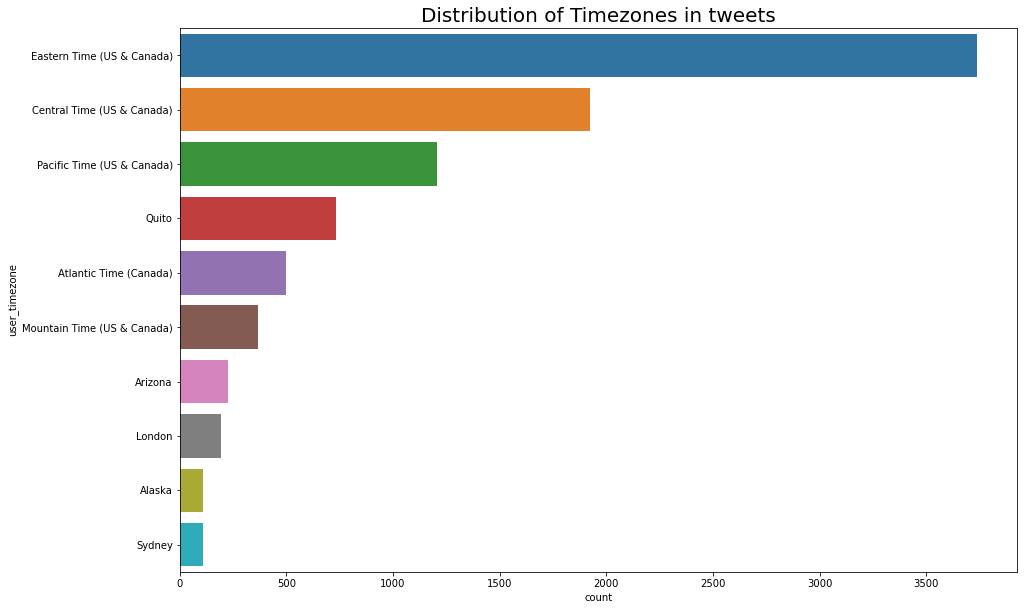

In [44]:
#get the count of tweets from every place
ds = dt.groupby(['user_timezone']).sum().sort_values(by='count', ascending=False).reset_index()

# get the plot with no of twwets contains x number of tags
dt = ds[:10]

plt.figure(figsize=(15, 10))
fig = sns.barplot( 
    x
    =dt["count"], 
    y=dt["user_timezone"], 
    orientation='horizontal'
).set_title('Distribution of Timezones in tweets', fontsize = 20)


**Inferences:**

    - EST US Timezone has highest number of user tweets followed by CST US Timezone

### Location of Tweets (Top 10)

In [45]:
# take the top 500 user locations based on no of tweets
dt = tweets['tweet_location'].value_counts().reset_index()  
dt.columns = ['user_location', 'count']
dt = dt.sort_values(['count'],ascending=False)[:10] #top 50 places
dt.head()


user_location  count
0      Boston, MA    157
1    New York, NY    156
2  Washington, DC    148
3        New York    127
4             USA    125

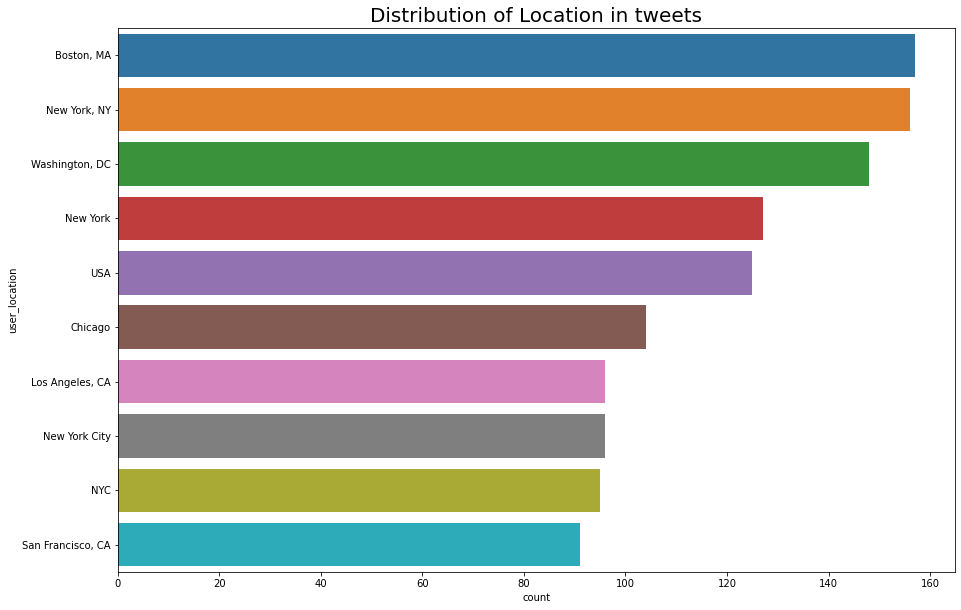

In [46]:
#get the count of tweets from every place
ds = dt.groupby(['user_location']).sum().sort_values(by='count', ascending=False).reset_index()

# get the plot with no of twwets contains x number of tags
dt = ds[:10]

plt.figure(figsize=(15, 10))
fig = sns.barplot( 
    x
    =dt["count"], 
    y=dt["user_location"], 
    orientation='horizontal'
).set_title('Distribution of Location in tweets', fontsize = 20)


**Inferences:**

    - Boston has highest number of user tweets followed by New York, NY

<a id='EDA-Airlines'> </a>

## EDA - Analysis based on Airlines
*[Click to return to TOC](#summary_home)*

---

### Distribution of Tweets among each Airlines

# of Tweets for each Airlines
United            3822
US Airways        2913
American          2723
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64


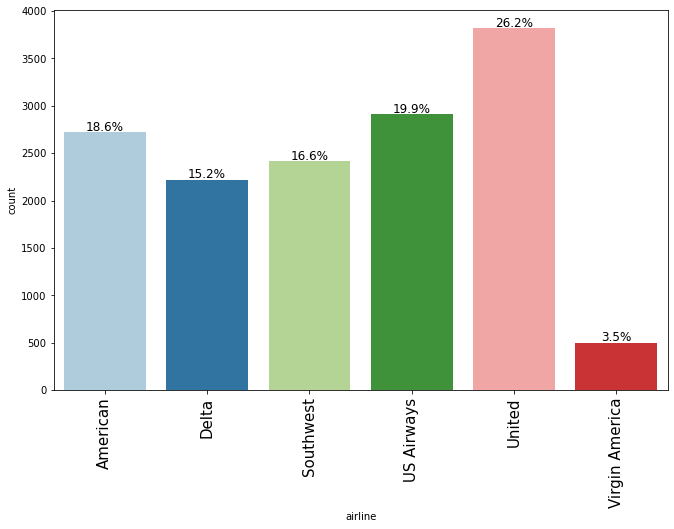

In [47]:
print("# of Tweets for each Airlines")
print(tweets["airline"].value_counts(dropna=False))
labeled_barplot(tweets, "airline", perc=True, n=10);

**Inferences:**

    - There are 6 airlines data that are being considered for this classificiation. 
    - "United" airlines has received more tweets, followed by "US Airways" & "American"
    - 26% of the tweets are for United airlines

---

### Distribution of Sentiment of Tweets across Airlines

Count of Sentiment of tweets for each Airline:
airline
American          2723
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


Distribution of Sentiment of tweets for each Airline:
airline         airline_sentiment
American        negative             71.281675
                neutral              16.709512
                positive             12.008814
Delta           negative             42.979298
                neutral              32.538254
                positive             24.482448
Southwest       negative             49.008264
                neutral              27.438017
                positive             23.553719
US Airways      negative             77.686234
                neutral              13.079300
                positive              9.234466
United          negative             68.890633
                neutral              18.236525
                posit

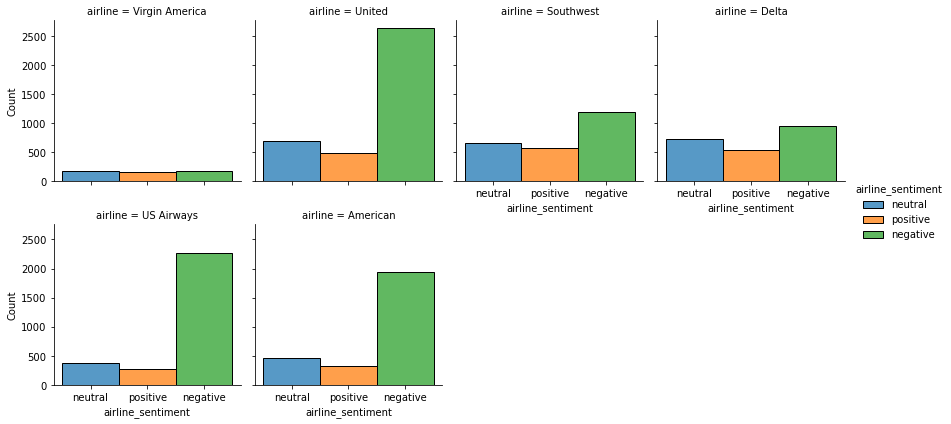

In [48]:
print("Count of Sentiment of tweets for each Airline:")
print(tweets.groupby('airline')['airline_sentiment'].count())
print("")
print("")

print("Distribution of Sentiment of tweets for each Airline:")
print(tweets.groupby('airline')['airline_sentiment'].value_counts(1) * 100)
print("")

g = sns.FacetGrid(
    tweets, col="airline", hue="airline_sentiment", col_wrap=4, margin_titles=True
)
g.map(sns.histplot, "airline_sentiment")
g.add_legend()

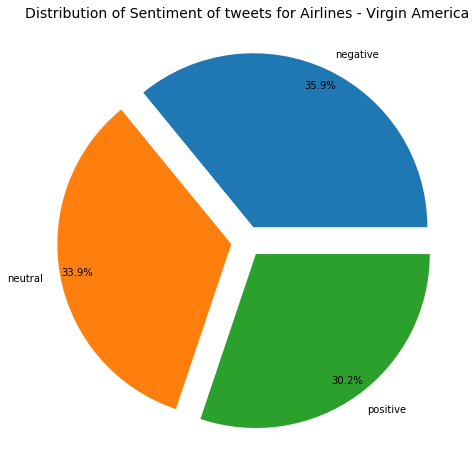

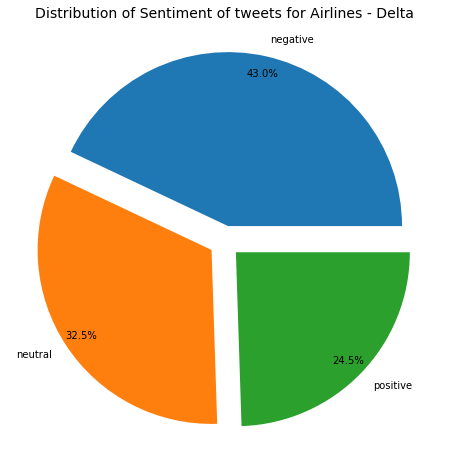

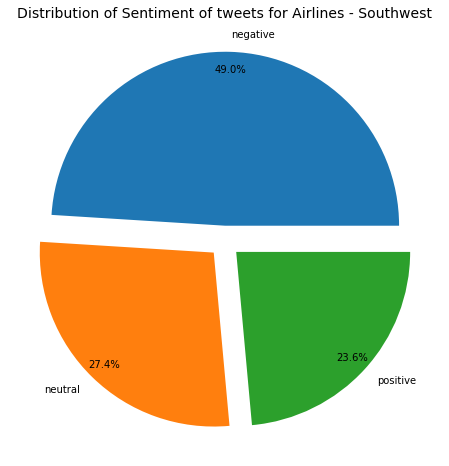

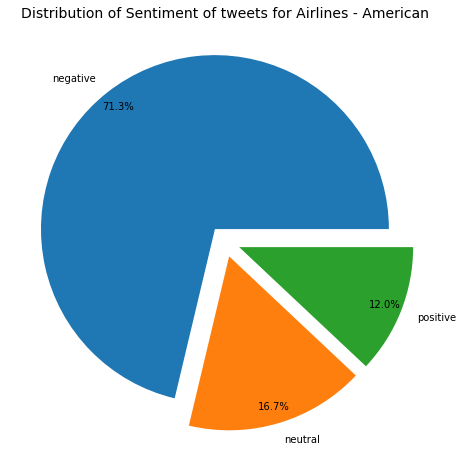

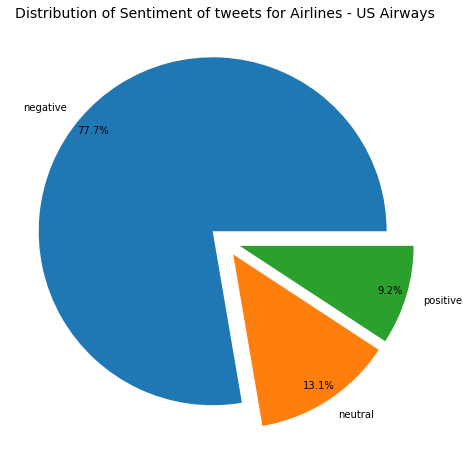

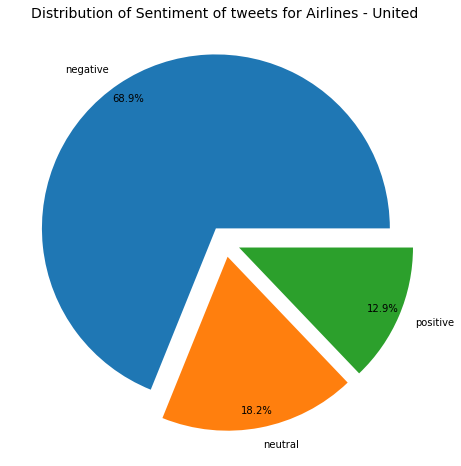

In [49]:
labels = tweets['airline'].value_counts().sort_values().keys();
for i in labels :
    pie, ax = plt.subplots(figsize=[10,8])
    plt.title("Distribution of Sentiment of tweets for Airlines - " + i, fontsize=14);
    Category=tweets[tweets.airline == i].airline_sentiment.value_counts()
    plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*Category.count(), labels=Category.keys(), pctdistance=0.9)
    plt.show()
    print("")
    print("")

**Inferences:**

**Almost all airlines have recived more of Negative comments. Looks like users tend to tweet more when they need to convey Negative message based on their concerns or issues faced.**

Analysing the sentiments based on the respective airlines:

- `American` - 71% of Negative comments reported followed by 16% Neutral and 12% of Positive comments
- `Delta` - 43% of Negative comments reported followed by 32% Neutral and 24% of Positive comments
- `SouthWest` - 49% of Negative comments reported followed by 27% Neutral and 23% of Positive comments
- `US Airways` - 77% of Negative comments reported followed by 13% Neutral and 9% of Positive comments
- `United` - 69% of Negative comments reported followed by 18% Neutral and 12% of Positive comments
- `Virgin America` - 35% of Negative comments reported followed by 33% Neutral and 30% of Positive comments
</br></br>
- **Even though `United` airlines has received more number of tweets, based on the above distribution we find `US Airways` seems to have the most Negative comments, followed by `American` airlines and `United` airlines.** </br></br>
- **Also, we can observe that `Virgin America` airlines has 30% of the positive comments followed by `Delta` with 24% & `SouthWest` with 23.5% from the tweets received for these airlines.**

---

### Reasons for Negative tweets across Airlines

Negative Reasons for Airlines - Virgin America
Customer Service Issue         33.149171
Flight Booking Problems        15.469613
Can't Tell                     12.154696
Bad Flight                     10.497238
Cancelled Flight                9.944751
Late Flight                     9.392265
Lost Luggage                    2.762431
Flight Attendant Complaints     2.762431
Damaged Luggage                 2.209945
longlines                       1.657459
Name: negativereason, dtype: float64


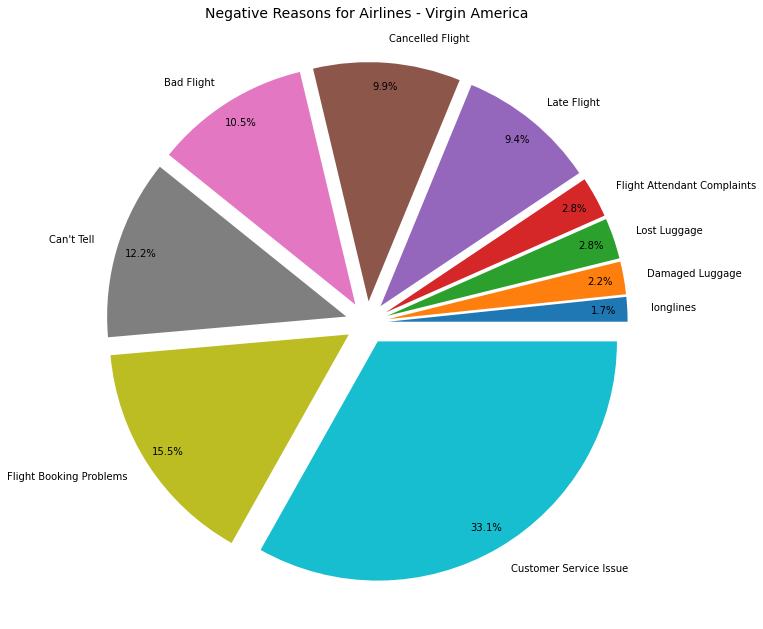



Negative Reasons for Airlines - Delta
Late Flight                    28.167539
Customer Service Issue         20.837696
Can't Tell                     19.476440
Bad Flight                      6.701571
Flight Attendant Complaints     6.282723
Lost Luggage                    5.968586
Cancelled Flight                5.340314
Flight Booking Problems         4.607330
longlines                       1.465969
Damaged Luggage                 1.151832
Name: negativereason, dtype: float64


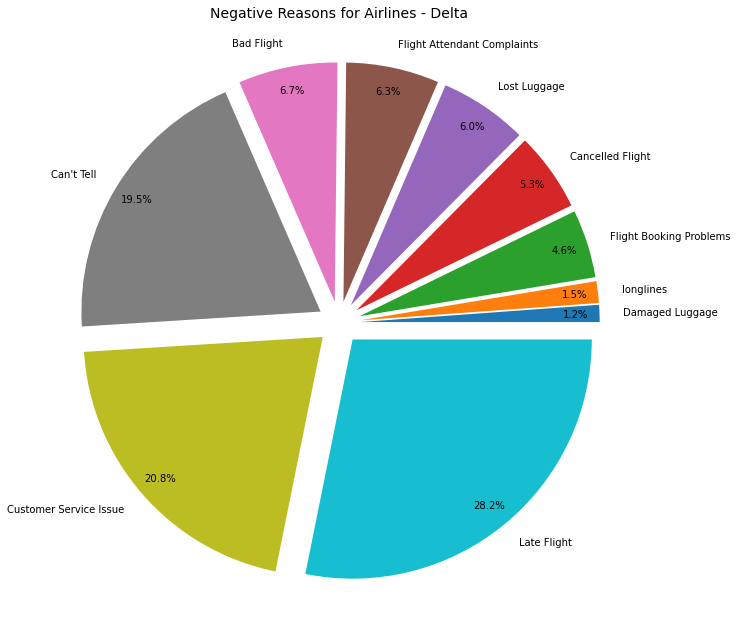



Negative Reasons for Airlines - Southwest
Customer Service Issue         32.967960
Cancelled Flight               13.659359
Can't Tell                     13.406408
Late Flight                    12.816189
Bad Flight                      7.588533
Lost Luggage                    7.588533
Flight Booking Problems         5.143339
Flight Attendant Complaints     3.204047
longlines                       2.445194
Damaged Luggage                 1.180438
Name: negativereason, dtype: float64


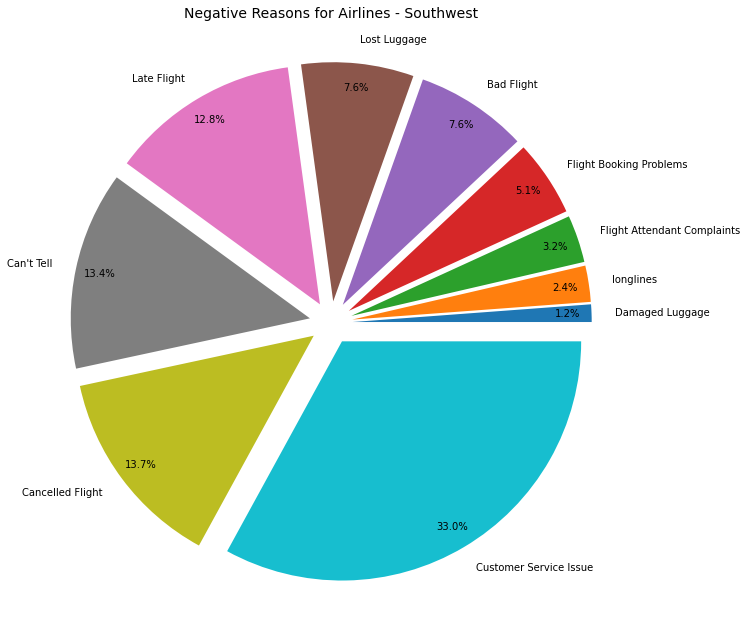



Negative Reasons for Airlines - American
Customer Service Issue         39.258114
Late Flight                    12.570840
Cancelled Flight               12.467800
Can't Tell                     10.200927
Lost Luggage                    7.521896
Flight Booking Problems         6.697579
Bad Flight                      4.482226
Flight Attendant Complaints     4.430706
longlines                       1.751674
Damaged Luggage                 0.618238
Name: negativereason, dtype: float64


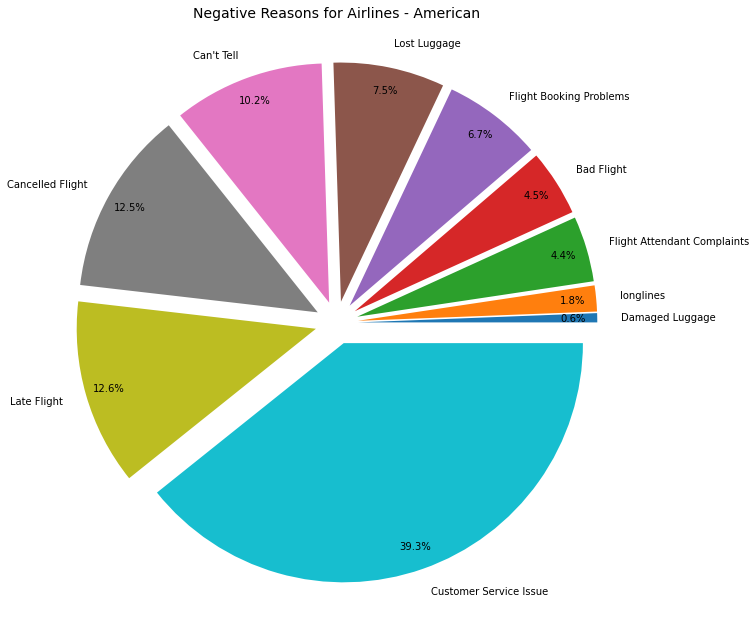



Negative Reasons for Airlines - US Airways
Customer Service Issue         35.837384
Late Flight                    20.017676
Can't Tell                     10.870526
Cancelled Flight                8.351745
Lost Luggage                    6.805126
Flight Attendant Complaints     5.435263
Flight Booking Problems         5.391074
Bad Flight                      4.595669
longlines                       2.209456
Damaged Luggage                 0.486080
Name: negativereason, dtype: float64


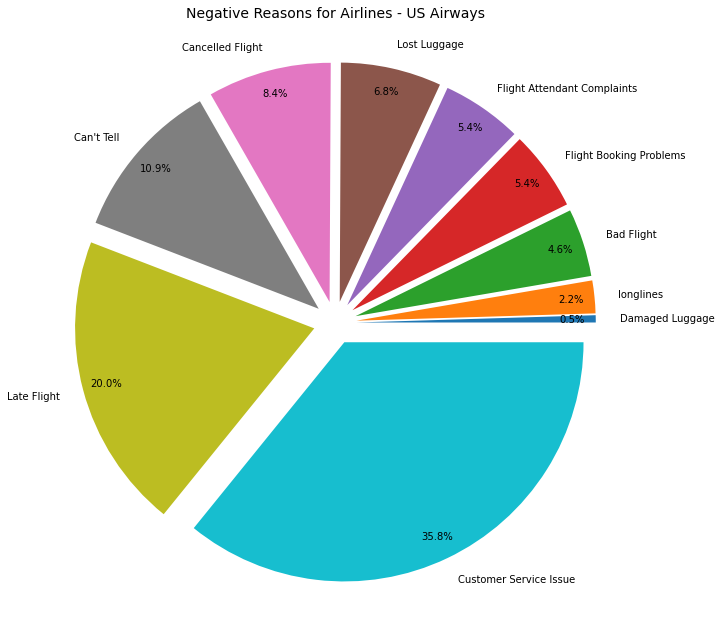



Negative Reasons for Airlines - United
Customer Service Issue         25.864033
Late Flight                    19.939233
Can't Tell                     14.394227
Lost Luggage                   10.216483
Bad Flight                      8.203570
Cancelled Flight                6.874288
Flight Attendant Complaints     6.380555
Flight Booking Problems         5.469047
longlines                       1.823016
Damaged Luggage                 0.835549
Name: negativereason, dtype: float64


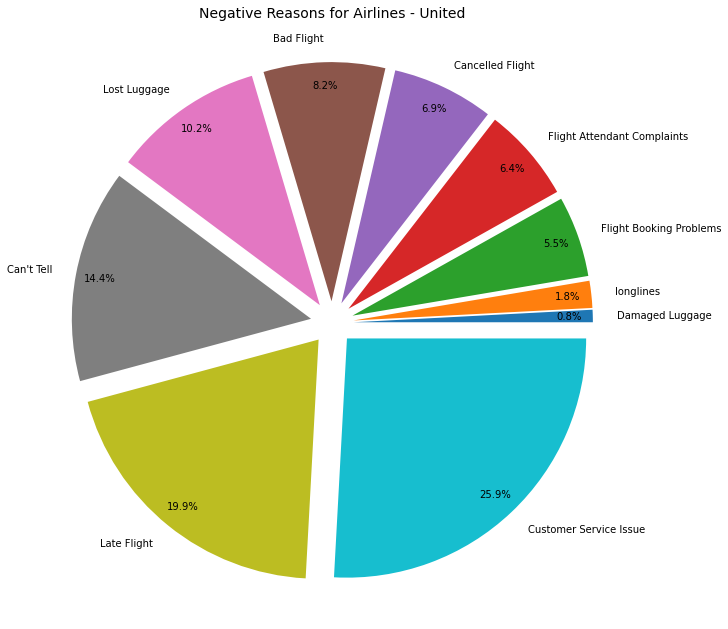

In [50]:
labels = tweets['airline'].value_counts().sort_values().keys();

for i in labels :
    print("Negative Reasons for Airlines - " + i);
    print(tweets[tweets.airline == i].negativereason.value_counts(1) * 100)
    pie, ax = plt.subplots(figsize=[20,11])
    plt.title("Negative Reasons for Airlines - " + i, fontsize=14);
    Category=tweets[tweets.airline == i].negativereason.value_counts().sort_values()
    plt.pie(x=Category, autopct="%.1f%%", explode=[0.09]*Category.count(), labels=Category.keys(), pctdistance=0.9)
    plt.show()
    print("")
    print("")

In [51]:
print("Count of Negative tweets for each Airline:")
print(tweets.groupby('airline')['negativereason'].count())
print("")
print("")

print("Distribution of Sentiment of tweets for each Airline:")
print(tweets.groupby('negativereason')['airline'].value_counts(1) * 100)
print("")


Count of Negative tweets for each Airline:
airline
American          1941
Delta              955
Southwest         1186
US Airways        2263
United            2633
Virgin America     181
Name: negativereason, dtype: int64


Distribution of Sentiment of tweets for each Airline:
negativereason               airline       
Bad Flight                   United            37.241379
                             US Airways        17.931034
                             Southwest         15.517241
                             American          15.000000
                             Delta             11.034483
                             Virgin America     3.275862
Can't Tell                   United            31.848739
                             US Airways        20.672269
                             American          16.638655
                             Delta             15.630252
                             Southwest         13.361345
                             Virgin America     1

**Inferences:**

**Almost all airlines have reported "Customer Service Issue" has the top reasons except Delta airlines which has "Late Flights" as the major concern.**

Analysing the negative reasons based on the respective airlines:

- `American` - Customer Service Issues(39%), Late Flight (13%), Cancelled Flight (13%). Not much concerns reported under Longlines or damaged luggage
- `Delta` - : Late flight (28%), Customer Service Issue (21%), Cant Tell (19%). Not much concerns reported under Longlines or damaged luggage
- `SouthWest` - Customer Service Issue (33%), Cancelled Flight (14%), Can't Tell (13%). Not much concerns reported under Longlines or damaged luggage
- `US Airways` - Customer Service Issues (36%), Late Flight (20%), Cant tell (11%). 
- `United` - Customer Service Issues(26%), Late Flight (20%), Cant tell (14%). 
- `Virgin America` - Customer Service Issue (33%), Flight Booking Problems (15%), Cant tell (12%). Not much concerns reported under Longlines or damaged or lost luggage
  

---

### Most retweeted Tweet across Airlines

In [52]:
print("*** Overall ***")
print("Airline --- >" , tweets.iloc[tweets['retweet_count'].idxmax()]['airline'])
print("Max Tweet Count ----> ", tweets.iloc[tweets['retweet_count'].idxmax()]['retweet_count'])
print("Tweet Content ---> ", tweets.iloc[tweets['retweet_count'].idxmax()]['text'])
print("Tweet Sentiment ---> ", tweets.iloc[tweets['retweet_count'].idxmax()]['airline_sentiment'])
print(" ")
print(" *****************************")
print(" ")

labels = tweets['airline'].value_counts().sort_values().keys();
for i in labels :
    print("Airline --- >" , tweets.loc[tweets[tweets.airline == i].retweet_count.idxmax()]['airline'])
    print("Max Tweet Count ----> ", tweets.loc[tweets[tweets.airline == i].retweet_count.idxmax()]['retweet_count'])
    print("Tweet Content ---> ", tweets.loc[tweets[tweets.airline == i].retweet_count.idxmax()]['text'])
    print("Tweet Content ---> ", tweets.loc[tweets[tweets.airline == i].retweet_count.idxmax()]['airline_sentiment'])
    print(" ")


*** Overall ***
Airline --- > US Airways
Max Tweet Count ---->  44
Tweet Content --->  @USAirways 5 hr flight delay and a delay when we land . Is that even real life ? Get me off this plane , I wanna go home 👠👠👠 (3 heel clicks)
Tweet Sentiment --->  negative
 
 *****************************
 
Airline --- > Virgin America
Max Tweet Count ---->  4
Tweet Content --->  @VirginAmerica @AmericanAir can u help with flights to get a 2y old battling cancer who needs treatment in 🇺🇸 @FreyaBevan_Fund 💗 🎀 💗
Tweet Content --->  neutral
 
Airline --- > Delta
Max Tweet Count ---->  31
Tweet Content --->  STOP. USING.THIS.WORD. IF. YOU'RE. A. COMPANY. RT @JetBlue: Our fleet's on fleek. http://t.co/Fd2TNYcTrB
Tweet Content --->  negative
 
Airline --- > Southwest
Max Tweet Count ---->  22
Tweet Content --->  @SouthwestAir beautiful day in Seattle! http://t.co/iqu0PPVq2S
Tweet Content --->  positive
 
Airline --- > American
Max Tweet Count ---->  5
Tweet Content --->  @AmericanAir Cancelled Flight my fl

**Inferences:**

Analysing the negative reasons based on the respective airlines:

- Overall, `US Airways` airlines has the tweet which was most retweeted 44 times which was a negative sentiment
- `Delta` has a Negative tweet that was retweeted 31 times 
- `SouthWest` has a Positive tweet that was retweeted 22 times 
- `Virgin America` has a Neutral tweet that was retweeted 4 times 
- `American` has a Negative tweet that was retweeted 5 times 
- `United` has a Negative tweet that was retweeted 7 times 
 

---

### Analysis of the Retweets based on Positive Sentiment across Airlines

Count of retweets for each Airline:
airline
American           9
Delta             30
Southwest         23
US Airways         2
United             7
Virgin America     5
Name: retweet_count, dtype: int64


Distribution of Sentiment of tweets for each Airline:
airline         airline_sentiment  retweet_count
American        positive           1                 55.555556
                                   2                 22.222222
                                   3                 22.222222
Delta           positive           1                 70.000000
                                   2                  6.666667
                                   4                  6.666667
                                   3                  3.333333
                                   5                  3.333333
                                   6                  3.333333
                                   8                  3.333333
                                   11                 3.33333

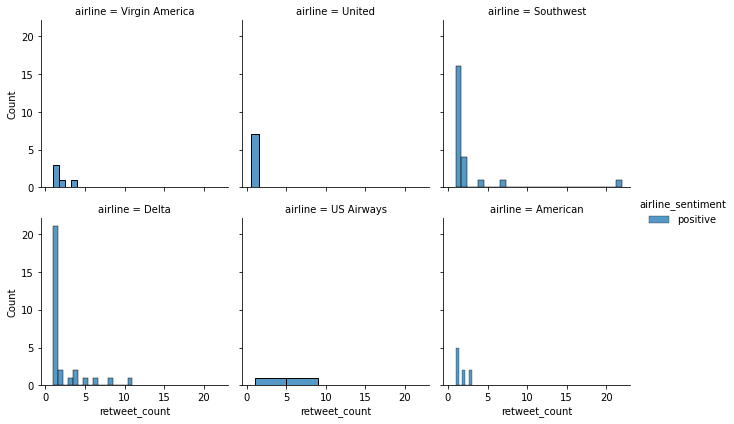

In [53]:
# Filtering the tweets that have only the retweets
retweetDF = tweets[(tweets["retweet_count"] != 0) & (tweets["airline_sentiment"] == "positive")]

print("Count of retweets for each Airline:")
print(retweetDF.groupby('airline')['retweet_count'].count())
print("")
print("")

print("Distribution of Sentiment of tweets for each Airline:")
print(retweetDF.groupby(['airline', 'airline_sentiment'])['retweet_count'].value_counts(1) * 100)
print("")


g = sns.FacetGrid(
    retweetDF, col="airline", hue="airline_sentiment", col_wrap=3, margin_titles=True
)
g.map(sns.histplot, "retweet_count")
g.add_legend()

**Inferences:**

Analysing the retweets based on the respective airlines:

- `Delta` airlines has a higher number of retweeets, followed by `South West`
- Among the retweets, `Southwest` airlines has a tweet that was retweeted multiple times
 

### Analysis of the Retweets based on Negative Sentiment across Airlines

Count of retweets for each Airline:
airline
American           62
Delta              28
Southwest          38
US Airways        113
United            353
Virgin America      2
Name: retweet_count, dtype: int64


Distribution of Sentiment of tweets for each Airline:
airline         airline_sentiment  retweet_count
American        negative           1                 75.806452
                                   2                 11.290323
                                   4                  8.064516
                                   3                  3.225806
                                   5                  1.612903
Delta           negative           1                 64.285714
                                   2                 14.285714
                                   3                  7.142857
                                   7                  3.571429
                                   18                 3.571429
                                   22                 3

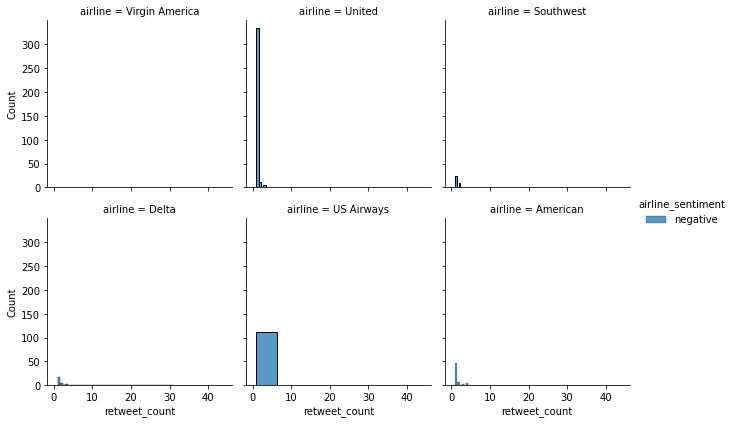

In [54]:
# Filtering the tweets that have only the retweets
retweetDF = tweets[(tweets["retweet_count"] != 0) & (tweets["airline_sentiment"] == "negative")]

print("Count of retweets for each Airline:")
print(retweetDF.groupby('airline')['retweet_count'].count())
print("")
print("")

print("Distribution of Sentiment of tweets for each Airline:")
print(retweetDF.groupby(['airline', 'airline_sentiment'])['retweet_count'].value_counts(1) * 100)
print("")


g = sns.FacetGrid(
    retweetDF, col="airline", hue="airline_sentiment", col_wrap=3, margin_titles=True
)
g.map(sns.histplot, "retweet_count")
g.add_legend()

**Inferences:**

Analysing the retweets based on the respective airlines:

- `United` airlines has a higher number of negative retweeets, followed by `US Airways`
- Among the retweets, `US Airways` airlines has a tweet that was retweeted multiple times
 

<a id='Common-Pre'> </a>

###  Most common words in the positive, negative & nextural Sentiment tweets - Before Data PreProcessing
*[Click to return to TOC](#summary_home)*


In [55]:
positve = tweets[tweets['airline_sentiment']=='positive']
negative = tweets[tweets['airline_sentiment']=='negative']
neutral = tweets[tweets['airline_sentiment']=='neutral']

print('Number of tweets with positive sentiment', positve.airline_sentiment.count())
print('Number of tweets with negative sentiment', negative.airline_sentiment.count())
print('Number of tweets with neutral sentiment', neutral.airline_sentiment.count())

Number of tweets with positive sentiment 2354
Number of tweets with negative sentiment 9159
Number of tweets with neutral sentiment 3091


In [56]:
commonTexts = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

#### Common words in Positive Sentiment tweet

In [57]:
commonTexts = positve.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

#### Common words in Negative Sentiment tweet

In [58]:
commonTexts = negative.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

#### Common words in Neutral Sentiment tweet

In [59]:
commonTexts = neutral.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

**Inferences:**

- We could see that the common words for the various sentiments differ based on the content
- The Text content needs to be treated in order to remove the special characters, mention, numbers, html characters etc which will be performed as part of the data preprocessing steps. 

#### Storing the original text for later reference

In [60]:
tweets["Original_Text"] = tweets["text"]
tweets["Original_Text"].head()

0                                                                    @VirginAmerica What @dhepburn said.
1                               @VirginAmerica plus you've added commercials to the experience... tacky.
2                                @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                @VirginAmerica and it's a really big bad thing about it
Name: Original_Text, dtype: object

### Dropping the Feature columns with too many missing values or with irrelevant information

In [61]:
#Drop the column which have got too many missing values or does not relevent information
tweets.drop(['negativereason_confidence', 'airline_sentiment_gold', 'negativereason_gold', 
             'tweet_coord', 'tweet_created', 'year', 'month'],axis=1,inplace=True)


**Inferences:**

- `negativereason_confidence` - Almost most of the tweets have either 100% confidence or 0% confidence. There is no significant information that can be derived 
- `airline_sentiment_gold`, `negativereason_gold`, `tweet_coord` - They have very high number of missing values that cannot be derived with the other informations 
- `tweet_created` - The date information has been split into year, month, date & hours and this column is not required 
- `year` & `month` - This dataset has the tweets specifically for Feb 2015. So we can drop these columns and consider only the hour & date fields
 
 

In [62]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14604 entries, 0 to 14603
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14604 non-null  object 
 1   airline_sentiment_confidence  14604 non-null  float64
 2   negativereason                9159 non-null   object 
 3   airline                       14604 non-null  object 
 4   name                          14604 non-null  object 
 5   retweet_count                 14604 non-null  int64  
 6   text                          14604 non-null  object 
 7   tweet_location                9881 non-null   object 
 8   user_timezone                 9790 non-null   object 
 9   dates                         14604 non-null  int64  
 10  hour                          14604 non-null  int64  
 11  Original_Text                 14604 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 1.3+ MB


In [63]:
tweets.head()

airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

          airline        name  retweet_count  \
0  Virgin America     cairdin              0   
1  Virgin America    jnardino              0   
2  Virgin America  yvonnalynn              0   
3  Virgin America    jnardino              0   
4  Virgin America    jnardino              0   

                                                                                                  text  \
0                                                                  @VirginAmerica What @dhepburn said.   
1                             @VirginAmerica plus you've added commercials to the experience... tacky.   
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...   
4                                              @VirginAmerica and it's a really big bad thing about it   

  tweet_location               user_timezone  dates  hour  \
0            NaN  Eastern Time (US & Canada)     24    11   
1            NaN  Pacific Time (US & Canada)     24    11   
2      Lets Play  Central Time (US & Canada)     24    11   
3            NaN  Pacific Time (US & Canada)     24    11   
4            NaN  Pacific Time (US & Canada)     24    11   

                                                                                         Original_Text  
0                                                                  @VirginAmerica What @dhepburn said.  
1                             @VirginAmerica plus you've added commercials to the experience... tacky.  
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!  
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...  
4                                              @VirginAmerica and it's a really big bad thing about it

---

<a id='dataPreprocessing'> </a>

## Data Preprocessing
*[Click to return to TOC](#summary_home)*

---

Following pre processing steps will be performed to prepare the data for the sentiment analysis

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.
- Remove numbers.
- Remove URLs.
- Removal of @Mention
- Tokenization.
- Removal of Non Ascii codes
- Conversion to lowercase
- Removel of special Characters & Punctuations
- Remove Stopwords
- Lemmatized data
- Used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [64]:
tweets["text"].head()

0                                                                    @VirginAmerica What @dhepburn said.
1                               @VirginAmerica plus you've added commercials to the experience... tacky.
2                                @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

### Removal of HTML tags

In [65]:
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

#remove the html tags
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

print("")
print("- HTML Tags removed.")

tweets['text'] = tweets['text'].apply(lambda x: strip_html(x))
tweets['text'].head(5)


- HTML Tags removed.


0                                                                    @VirginAmerica What @dhepburn said.
1                               @VirginAmerica plus you've added commercials to the experience... tacky.
2                                @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

### Removal of Emojis

In [66]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

print("")
print("- Emojis removed.")

tweets['text'] = tweets['text'].apply(lambda x: remove_emoji(x))
tweets['text'].head(5)


- Emojis removed.


0                                                                    @VirginAmerica What @dhepburn said.
1                               @VirginAmerica plus you've added commercials to the experience... tacky.
2                                @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...
4                                                @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

### Replace Contractions

In [67]:
import contractions                                     # Import contractions library.

#expand the contractions
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

print("")
print("- Contractions removed.")

tweets['text'] = tweets['text'].apply(lambda x: replace_contractions(x))
tweets['text'].head(5)



- Contractions removed.


0                                                                    @VirginAmerica What @dhepburn said.
1                             @VirginAmerica plus you have added commercials to the experience... tacky.
2                               @VirginAmerica I did not today... Must mean I need to take another trip!
3    @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces ...
4                                               @VirginAmerica and it is a really big bad thing about it
Name: text, dtype: object

### Removal of Numbers

In [68]:
#remove the numericals present in the text
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

print("")
print("- Numbers removed.")

tweets['text'] = tweets['text'].apply(lambda x: remove_numbers(x))
tweets['text'].head(5)



- Numbers removed.


0                                                                    @VirginAmerica What @dhepburn said.
1                             @VirginAmerica plus you have added commercials to the experience... tacky.
2                               @VirginAmerica I did not today... Must mean I need to take another trip!
3    @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces ...
4                                               @VirginAmerica and it is a really big bad thing about it
Name: text, dtype: object

### Removal of URLs

In [69]:
# remove the url's present in the text
def remove_url(text): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
    return text

print("")
print("- URLs removed.")

tweets['text'] = tweets['text'].apply(lambda x: remove_url(x))
tweets['text'].head(5)



- URLs removed.


0                                                                    @VirginAmerica What @dhepburn said.
1                             @VirginAmerica plus you have added commercials to the experience... tacky.
2                               @VirginAmerica I did not today... Must mean I need to take another trip!
3    @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces ...
4                                               @VirginAmerica and it is a really big bad thing about it
Name: text, dtype: object

### Removal of Mention in tweets

In [70]:
# remove the mentions in the tweets
def remove_mention(text):
    text = re.sub(r'@\w+','',text)
    return text

print("")
print("- @Mentions removed.")

tweets['text'] = tweets['text'].apply(lambda x: remove_mention(x))
tweets['text'].head(5)




- @Mentions removed.


0                                                                                            What  said.
1                                            plus you have added commercials to the experience... tacky.
2                                              I did not today... Must mean I need to take another trip!
3     it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have li...
4                                                              and it is a really big bad thing about it
Name: text, dtype: object

### Tokenization of Data

In [71]:

print("")
print("- Tokenization Done.")

tweets['text'] = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
tweets["text"].head(5)




- Tokenization Done.


0                                                                                        [What, said, .]
1                              [plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                             [I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', f...
4                                                   [and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

### Installing Stopwords

In [72]:
stopwordS=stopwords.words('english')
stopwordS = list(set(stopwordS)) 
lemmatizer = WordNetLemmatizer()

### Removal of Non ASCII codes

In [73]:
#remove the non-ASCII characters
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

print("")
print("- Non ASCII codes removed.")

tweets['text'] = tweets['text'].apply(lambda x: remove_non_ascii(x))
tweets['text'].head(5)



- Non ASCII codes removed.


0                                                                                        [What, said, .]
1                              [plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                             [I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', f...
4                                                   [and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

### Lowercase conversion

In [74]:
# convert all characters to lowercase
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

print("")
print("- Converted to lower case.")

tweets['text'] = tweets['text'].apply(lambda x: to_lowercase(x))
tweets['text'].head(5)



- Converted to lower case.


0                                                                                        [what, said, .]
1                              [plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                             [i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]
3    [it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', f...
4                                                   [and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

### Removal Punctuations

In [75]:
# Remove the punctuations
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


print("")
print("- Punctuations removed")

tweets['text'] = tweets['text'].apply(lambda x: remove_punctuation(x))
tweets['text'].head(5)


- Punctuations removed


0                                                                                           [what, said]
1                                      [plus, you, have, added, commercials, to, the, experience, tacky]
2                                     [i, did, not, today, must, mean, i, need, to, take, another, trip]
3    [it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they,...
4                                                   [and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

### Removal of Stop Words

In [76]:
stopwords = stopwords.words('english')

# Remove the stop words
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwordS:
            new_words.append(word)
    return new_words

print("")
print("- Stop Words removed")

tweets['text'] = tweets['text'].apply(lambda x: remove_stopwords(x))
tweets['text'].head(5)


- Stop Words removed


0                                                                                    [said]
1                                             [plus, added, commercials, experience, tacky]
2                                            [today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]
4                                                                 [really, big, bad, thing]
Name: text, dtype: object

### Lemmatize Words

In [77]:
# lemmatize the words
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

print("")
print("- Lemmatization done")

tweets['text'] = tweets['text'].apply(lambda x: lemmatize_list(x))
tweets['text'].head(5)


- Lemmatization done


0                                                                                    [say]
1                                              [plus, add, commercials, experience, tacky]
2                                           [today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]
4                                                                [really, big, bad, thing]
Name: text, dtype: object

In [78]:
def normalize(words):
    text_string=" ".join(words)
    return text_string

tweets['text'] = tweets['text'].apply(lambda x: normalize(x))
tweets['text'].head(5)

0                                                                            say
1                                          plus add commercials experience tacky
2                                         today must mean need take another trip
3    really aggressive blast obnoxious entertainment guests face little recourse
4                                                           really big bad thing
Name: text, dtype: object

In [79]:
tweets.head()

airline_sentiment  airline_sentiment_confidence negativereason  \
0           neutral                        1.0000            NaN   
1          positive                        0.3486            NaN   
2           neutral                        0.6837            NaN   
3          negative                        1.0000     Bad Flight   
4          negative                        1.0000     Can't Tell   

          airline        name  retweet_count  \
0  Virgin America     cairdin              0   
1  Virgin America    jnardino              0   
2  Virgin America  yvonnalynn              0   
3  Virgin America    jnardino              0   
4  Virgin America    jnardino              0   

                                                                          text  \
0                                                                          say   
1                                        plus add commercials experience tacky   
2                                       today must mean need take another trip   
3  really aggressive blast obnoxious entertainment guests face little recourse   
4                                                         really big bad thing   

  tweet_location               user_timezone  dates  hour  \
0            NaN  Eastern Time (US & Canada)     24    11   
1            NaN  Pacific Time (US & Canada)     24    11   
2      Lets Play  Central Time (US & Canada)     24    11   
3            NaN  Pacific Time (US & Canada)     24    11   
4            NaN  Pacific Time (US & Canada)     24    11   

                                                                                         Original_Text  
0                                                                  @VirginAmerica What @dhepburn said.  
1                             @VirginAmerica plus you've added commercials to the experience... tacky.  
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!  
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...  
4                                              @VirginAmerica and it's a really big bad thing about it

---

<a id='Common-Post'> </a>

###  Most common words in the positive, negative & nextural Sentiment tweets - Post Data Processing
*[Click to return to TOC](#summary_home)*


In [80]:
tweets["text"].head()

0                                                                            say
1                                          plus add commercials experience tacky
2                                         today must mean need take another trip
3    really aggressive blast obnoxious entertainment guests face little recourse
4                                                           really big bad thing
Name: text, dtype: object

#### The most Common words in content column

In [81]:
commonTexts = tweets.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

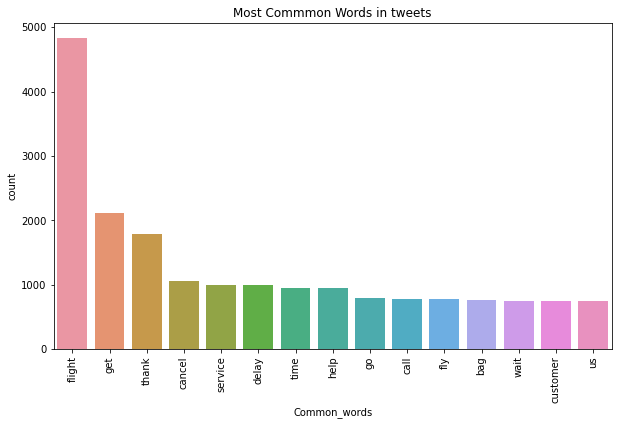

In [82]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq, ax=ax)
plt.title("Most Commmon Words in tweets")
plt.xticks(rotation='vertical');

In [83]:
Positive_sent = tweets[tweets['airline_sentiment']=='positive']
Negative_sent = tweets[tweets['airline_sentiment']=='negative']
Neutral_sent = tweets[tweets['airline_sentiment']=='neutral']

print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2354
Number of tweets with negative sentiment 9159
Number of tweets with neutral sentiment 3091


 ### Finding common words for positive sentiment tweets

In [84]:
commonTexts = Positive_sent.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_Positive_Words','count']
freq.style.background_gradient(cmap='Reds')

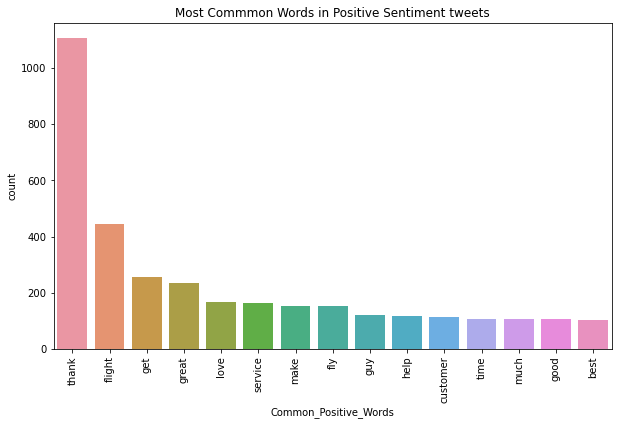

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_Positive_Words', y='count', 
            data=freq, ax=ax)
plt.title("Most Commmon Words in Positive Sentiment tweets")
plt.xticks(rotation='vertical');

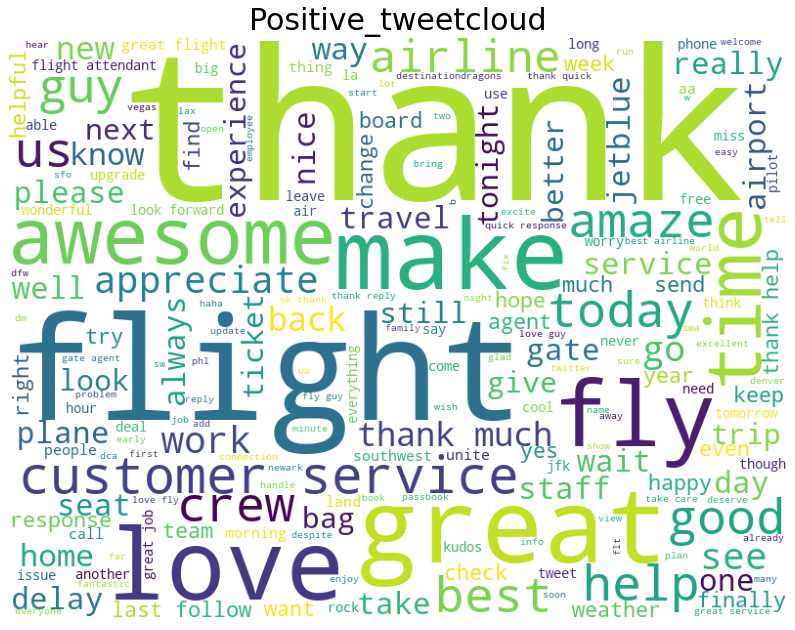

In [86]:
show_wordcloud(Positive_sent, "Positive_tweetcloud")


**- Words like thank, flight, get, great, love, service in the positive sentiment tweet**.

 ### Finding common words for negative sentiment tweets

In [87]:
commonTexts = Negative_sent.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_Negative_Words','count']
freq.style.background_gradient(cmap='Reds')

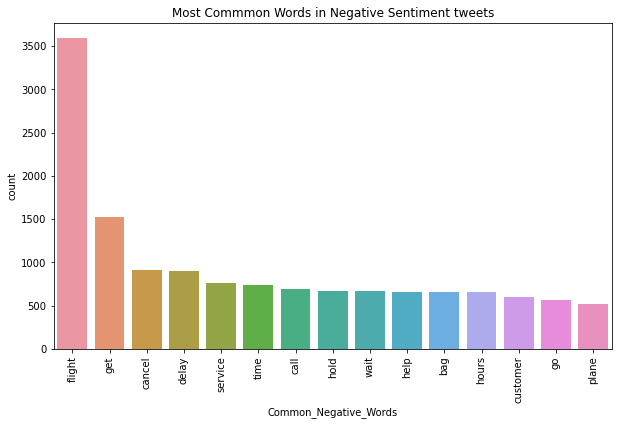

In [88]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_Negative_Words', y='count', 
            data=freq, ax=ax)
plt.title("Most Commmon Words in Negative Sentiment tweets")
plt.xticks(rotation='vertical');

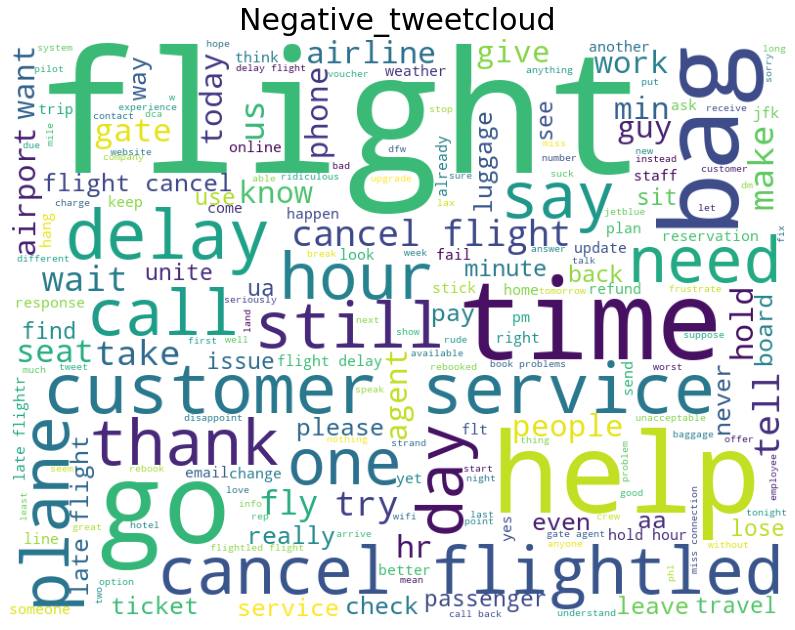

In [89]:
show_wordcloud(Negative_sent, "Negative_tweetcloud")


**- Words like flight, get, cancel, delay, service, time in the negative sentiment tweet**.

 ### Finding common words for neutral sentiment tweets

In [90]:
commonTexts = Neutral_sent.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in commonTexts for item in sublist])
freq = pd.DataFrame(top.most_common(15))
freq.columns = ['Common_Neutral_Words','count']
freq.style.background_gradient(cmap='Reds')

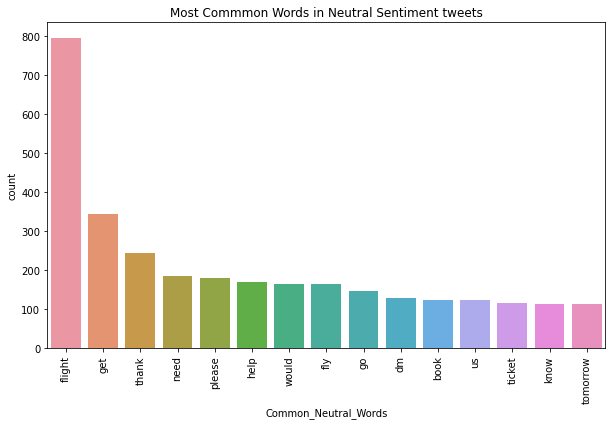

In [91]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_Neutral_Words', y='count', data=freq, ax=ax)
plt.title("Most Commmon Words in Neutral Sentiment tweets")
plt.xticks(rotation='vertical');

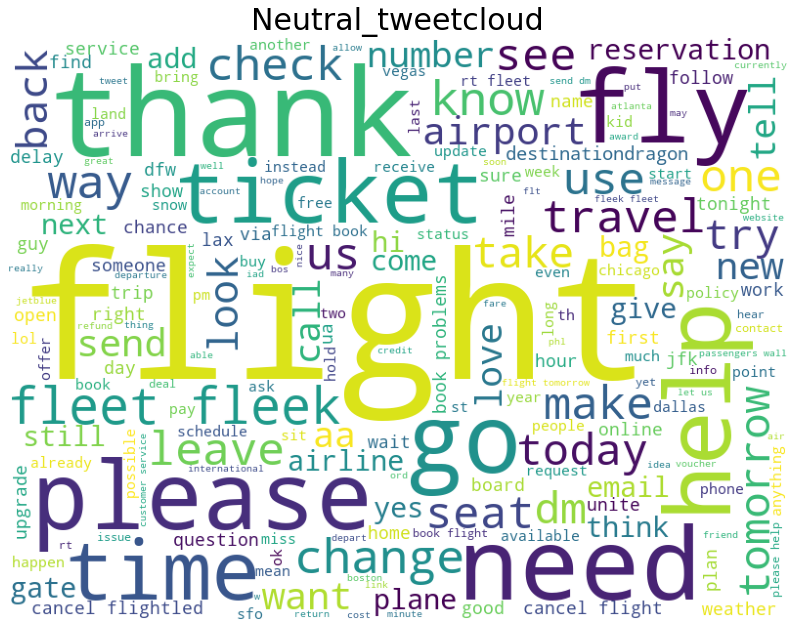

In [92]:
show_wordcloud(Neutral_sent, "Neutral_tweetcloud")


**- Words like flight, get, thank, need, please, help in the neutral sentiment tweet**.

<a id='model'> </a>

## Sentiment Model Analysis
*[Click to return to TOC](#summary_home)*


In [93]:
tweets["text"].head()

0                                                                            say
1                                          plus add commercials experience tacky
2                                         today must mean need take another trip
3    really aggressive blast obnoxious entertainment guests face little recourse
4                                                           really big bad thing
Name: text, dtype: object

In [94]:
tweets['airline_sentiment'] = tweets['airline_sentiment'].apply(lambda x: -1 if x == 'negative' else (1 if x == 'positive' else 0 ))


<a id='supermodel'> </a>

## Sentiment Analysis using Supervised Learning Methods
*[Click to return to TOC](#summary_home)*


In [95]:
labels = tweets['airline_sentiment']
labels.value_counts()
labels = labels.astype('int')
labels

0        0
1        1
2        0
3       -1
4       -1
        ..
14599    1
14600   -1
14601    0
14602   -1
14603    0
Name: airline_sentiment, Length: 14604, dtype: int32

<a id='Count'> </a>

### Building the model based on CountVectorizer and Random Forest
*[Click to return to TOC](#summary_home)*


In [96]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                
data_features = bow_vec.fit_transform(tweets["text"])

data_features = data_features.toarray()

In [97]:
# Split data into training and testing set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)


In [98]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))


RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7315120062257977


**The test accuracy for the basic RF classifier is at 73%. Further optmizing of the RF can be done**
</br> 
 

In [99]:
# Optimizing the parameter: Number of trees in the random forest model(n_estimators)
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [100]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())


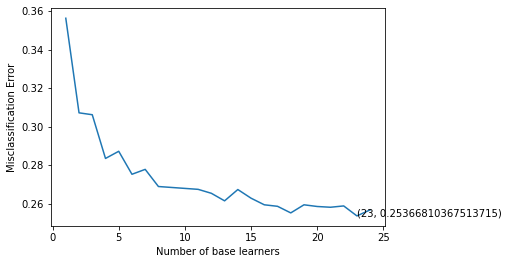

In [101]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()


**The optimal estimator is derived using the Cross validation**
</br> 
 

In [102]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7622090369694203

**The Test accuracy is at 76% which is inline with the Train accuracy**
</br> 
 

In [103]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

### Building the model based on CountVectorizer and GradientBoostingClassifier

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction =  gbc.predict(X_test)
accuracy_score(gbc_prediction,y_test)

0.7334550433591968

### Building the model based on CountVectorizer and DecisionTreeClassifier

In [105]:
from sklearn.tree import DecisionTreeClassifier

des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)
desc_tree_prediction =  des_tree_classifier.predict(X_test)
accuracy_score(desc_tree_prediction,y_test)

0.6839342765860338

**Model Comparison Summary:**

   - Based on the 3 models, we infer that Random Forest Classifier has a better accuracy score and hence we will **proceed to use Random Forest model** for predicting the results

In [106]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  
cr = classification_report(y_test, result)
print("Classification Report:\n----------------------\n", cr)


Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.82      0.89      0.85      2796
           0       0.58      0.48      0.53       885
           1       0.70      0.61      0.65       701

    accuracy                           0.76      4382
   macro avg       0.70      0.66      0.68      4382
weighted avg       0.75      0.76      0.75      4382



In [107]:
print(pd.crosstab(y_test, result, rownames=['Actual'], colnames=['Predicted']))

Predicted    -1    0    1
Actual                   
-1         2489  213   94
 0          375  425   85
 1          186   89  426


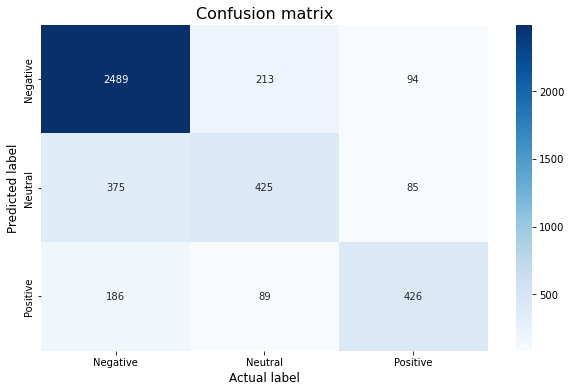

In [108]:
cm = confusion_matrix(y_test,result)
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)

#sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()

**From the Confusion Matrix we could see that the model works well and the predictions are to some extent inline with the actual sentiment values. The RF model can be tuned further for higher accuracy results and we can also try tuning the other models for better accuracy.**
</br> </br>
 

### Top 40 Features Wordcloud

In [109]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+='\n'

print(top_features)


thank
great
delay
flight
hours
hold
love
bag
get
call
cancel
amaze
awesome
best
hour
please
time
service
would
customer
worst
wait
help
fly
tell
never
fleek
still
follow
make
dm
plane
lose
say
go
try
one
appreciate
issue
us



**The above set of words were considered as the features in deriving the sentiment of each tweets.**
</br> </br>
 

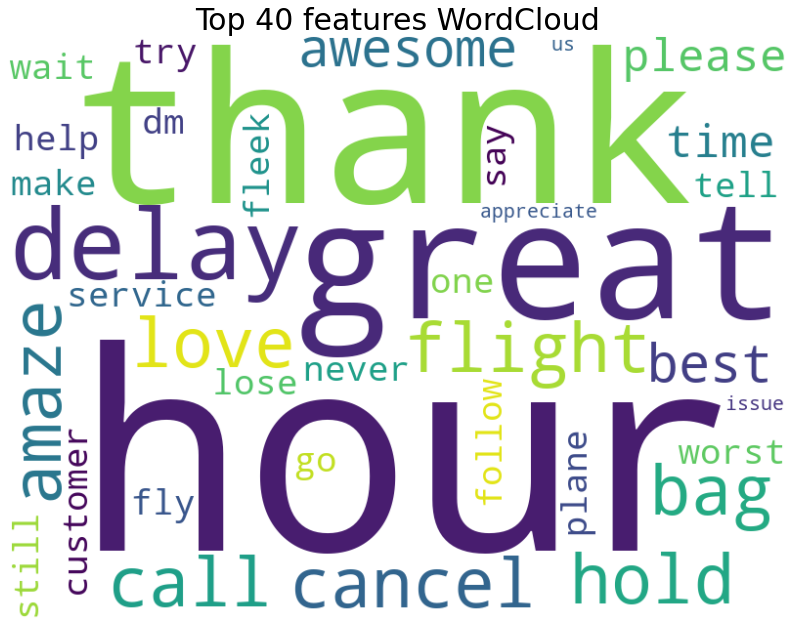

In [110]:
fig_wordcloud = WordCloud(background_color='white',
                colormap='viridis', width=800, height=600).generate(top_features)

plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud, interpolation='bilinear')  
plt.axis('off')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.show()

---

<a id='TFIDF'> </a>

### Building the model based on Term Frequency(TF) - Inverse Document Frequency(IDF)
*[Click to return to TOC](#summary_home)*


In [111]:
tweets["text"].head()

0                                                                            say
1                                          plus add commercials experience tacky
2                                         today must mean need take another trip
3    really aggressive blast obnoxious entertainment guests face little recourse
4                                                           really big bad thing
Name: text, dtype: object

In [112]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(tweets['text'])

data_features = data_features.toarray()

data_features.shape

(14604, 2000)

In [113]:
labels = tweets['airline_sentiment']
labels.value_counts()
labels = labels.astype('int')
labels

0        0
1        1
2        0
3       -1
4       -1
        ..
14599    1
14600   -1
14601    0
14602   -1
14603    0
Name: airline_sentiment, Length: 14604, dtype: int32

In [114]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [115]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)
forest = forest.fit(X_train, y_train)
print(forest)
print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))


RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7370581699530253


In [116]:
# Optimizing the parameter: Number of trees in the random forest model(n_estimators)
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [117]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())


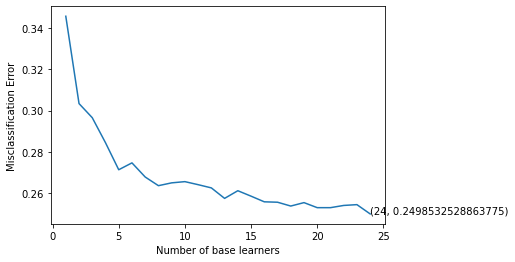

In [118]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()


In [119]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.759926973984482

In [120]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

### Building the model based on TfidfVectorizer and GradientBoostingClassifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_prediction =  gbc.predict(X_test)
accuracy_score(gbc_prediction,y_test)


0.7352806937471474

### Building the model based on TfidfVectorizer and DecisionTreeClassifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

des_tree_classifier = DecisionTreeClassifier()
des_tree_classifier.fit(X_train,y_train)
desc_tree_prediction =  des_tree_classifier.predict(X_test)
accuracy_score(desc_tree_prediction,y_test)


0.7010497489730717

**Model Comparison Summary:**

    - Based on the 3 models, we infer that Random Forest Classifier has a better accuracy score and hence we will proceed to use Random Forest model for predicting the results

In [123]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  
cr = classification_report(y_test, result)
print("Classification Report:\n----------------------\n", cr)


Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.80      0.91      0.85      2796
           0       0.60      0.44      0.51       885
           1       0.74      0.55      0.63       701

    accuracy                           0.76      4382
   macro avg       0.71      0.63      0.66      4382
weighted avg       0.75      0.76      0.75      4382



In [124]:
print(pd.crosstab(y_test, result, rownames=['Actual'], colnames=['Predicted']))


Predicted    -1    0    1
Actual                   
-1         2553  185   58
 0          415  393   77
 1          239   78  384


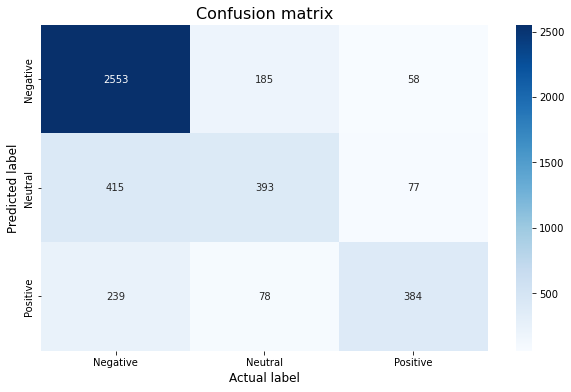

In [125]:
cm = confusion_matrix(y_test,result)
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)

#sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d')

plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


**From the Confusion Matrix we could see that the model works well and the predictions are to some extent inline with the actual sentiment values. The RF model can be tuned further for higher accuracy results and we can also try tuning the other models for better accuracy.**
</br> </br>
 

### Top 40 Features Wordcloud

In [126]:
all_features = vectorizer.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+='\n'

print(top_features)


thank
flight
great
delay
cancel
love
get
hours
call
hold
bag
hour
amaze
fly
best
time
good
awesome
follow
customer
service
dm
appreciate
fleet
fleek
need
please
still
wait
help
lose
make
never
much
know
send
go
tell
try
would



**The above set of words were considered as the features in deriving the sentiment of each tweets.**
</br> </br>
 

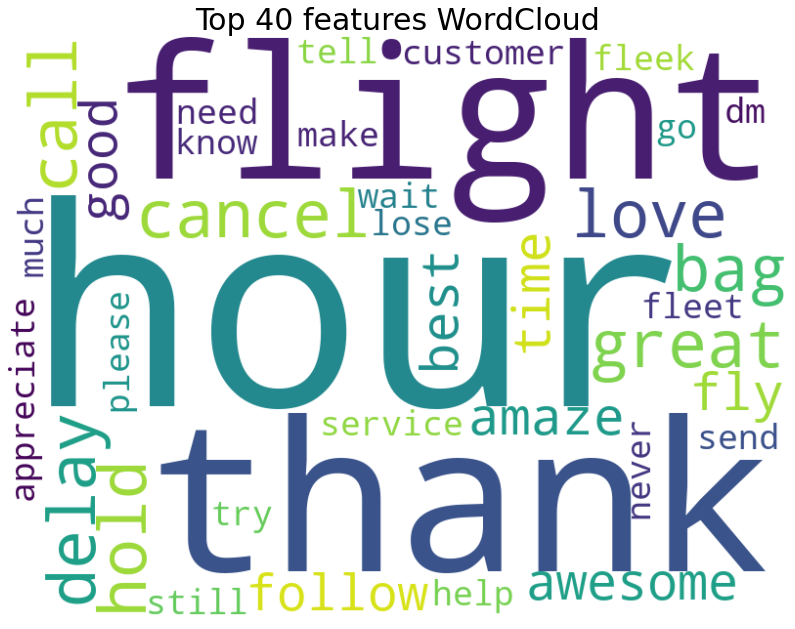

In [127]:
fig_wordcloud = WordCloud(background_color='white',
                colormap='viridis', width=800, height=600).generate(top_features)

plt.figure(figsize=(14,11), frameon=True)
plt.imshow(fig_wordcloud, interpolation='bilinear')  
plt.axis('off')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.show()

---

<a id='unsup'> </a>

## Sentiment Analysis using Unsupervised Learning Methods
*[Click to return to TOC](#summary_home)*

---

<a id='textblob'> </a>

## Building the model based using using Text Blob
*[Click to return to TOC](#summary_home)*


In [129]:
# Determine Polarity Scores
def sentiment_scores(words):
    sid_obj = TextBlob(words)

    # decide sentiment as positive, negative and neutral
    if sid_obj.sentiment.polarity > 0.05 :
        return (1)
 
    elif sid_obj.sentiment.polarity < - 0.05 :
        return (-1)
 
    else :
        return (0)

tweets['TextBlobSentiment'] = tweets['text'].apply(lambda x: sentiment_scores(x))
tweets.head(5)

airline_sentiment  airline_sentiment_confidence negativereason  \
0                  0                        1.0000            NaN   
1                  1                        0.3486            NaN   
2                  0                        0.6837            NaN   
3                 -1                        1.0000     Bad Flight   
4                 -1                        1.0000     Can't Tell   

          airline        name  retweet_count  \
0  Virgin America     cairdin              0   
1  Virgin America    jnardino              0   
2  Virgin America  yvonnalynn              0   
3  Virgin America    jnardino              0   
4  Virgin America    jnardino              0   

                                                                          text  \
0                                                                          say   
1                                        plus add commercials experience tacky   
2                                       today must mean need take another trip   
3  really aggressive blast obnoxious entertainment guests face little recourse   
4                                                         really big bad thing   

  tweet_location               user_timezone  dates  hour  \
0            NaN  Eastern Time (US & Canada)     24    11   
1            NaN  Pacific Time (US & Canada)     24    11   
2      Lets Play  Central Time (US & Canada)     24    11   
3            NaN  Pacific Time (US & Canada)     24    11   
4            NaN  Pacific Time (US & Canada)     24    11   

                                                                                         Original_Text  \
0                                                                  @VirginAmerica What @dhepburn said.   
1                             @VirginAmerica plus you've added commercials to the experience... tacky.   
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...   
4                                              @VirginAmerica and it's a really big bad thing about it   

   TextBlobSentiment  
0                  0  
1                  0  
2                 -1  
3                  0  
4                 -1

### Comparing the Sentiment scores of the tweet between Original vs Predicted

In [130]:
cr = classification_report(tweets['airline_sentiment'], tweets['TextBlobSentiment'])
print("Classification Report:\n----------------------\n", cr)


Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.89      0.26      0.41      9159
           0       0.28      0.64      0.39      3091
           1       0.30      0.61      0.40      2354

    accuracy                           0.40     14604
   macro avg       0.49      0.50      0.40     14604
weighted avg       0.66      0.40      0.40     14604



**As expected the accuracy scores of this model is not very high since Textblob uses simple methods to perform the sentiment analysis.**
</br> </br>
 

In [131]:
print(pd.crosstab(tweets['airline_sentiment'], tweets['TextBlobSentiment'], rownames=['Actual'], colnames=['Predicted']))

Predicted    -1     0     1
Actual                     
-1         2419  4274  2466
 0          219  1973   899
 1           86   828  1440


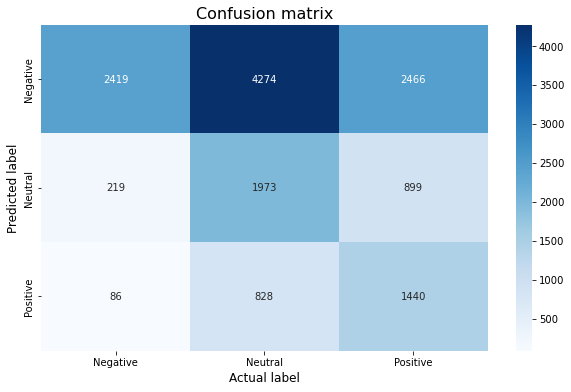

In [132]:
cm = confusion_matrix(tweets['airline_sentiment'], tweets['TextBlobSentiment'])
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)

plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


In [133]:
# Analysing the tewwt comments of the Actuals with Sentiment of 1 vs the Predicted with Sentiment of -1
tweets[(tweets['TextBlobSentiment'] == -1) & (tweets['airline_sentiment'] == 1)][["text", "Original_Text",
                                                                                  "airline_sentiment", "TextBlobSentiment"]].head(10)

text  \
114               come back phl already need take us horrible cold pleasecomeback   
233             airline base silicon valley disruption fcmostinnovative incubator   
307                                             mean probably inappropriate board   
429                 dream really open route dallas austin mean houston might next   
508                                                        thank fill luck common   
1014                             thank listen definitely person line think absurd   
1220              solve finally pick second time call thank response jh dull work   
1267       would like thank recognize terri p dull go way get back raleigh flight   
1352               staff rather efficient get us solutions freak little limbo air   
1633  add earlier tweet daughters th birthday present thank hard work make happen   

                                                                                            Original_Text  \
114   @VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #ple...   
233   @VirginAmerica, the only airline based in Silicon Valley! #disruption #FCmostinnovative #incubat...   
307                          @VirginAmerica I mean. Probably inappropriate while on board.. But, it's on!   
429   @VirginAmerica , am I dreaming? Did you really just open up a route between Dallas and Austin?! ...   
508                           @united thanks -- we filled it out. How's our luck with this? Is it common?   
1014  @united thanks for listening! I definitely was not the only person in line who thought it was ab...   
1220  @united been solved,  they finally picked up the second time I called,  thanks for the response ...   
1267  @United I'd like to thank and recognize Terri P at Dulles for going out of her way to get me bac...   
1352  @united the staff was rather efficient and got us solutions just freaked me out a little being i...   
1633  @united and to add to my earlier tweet. This was my daughters 5th Bday present. Thank you for th...   

      airline_sentiment  TextBlobSentiment  
114                   1                 -1  
233                   1                 -1  
307                   1                 -1  
429                   1                 -1  
508                   1                 -1  
1014                  1                 -1  
1220                  1                 -1  
1267                  1                 -1  
1352                  1                 -1  
1633                  1                 -1

In [134]:
# Analysing the tewwt comments of the Actuals with Sentiment of 1 vs the Predicted with Sentiment of -1
tweets[(tweets['TextBlobSentiment'] == 1) & (tweets['airline_sentiment'] == -1)][["text", "Original_Text",
                                                                                  "airline_sentiment", "TextBlobSentiment"]].head(10)

text  \
17         fly nyc sfo last week could fully sit seat due two large gentleman either side help   
20                                    first fare may three time carriers seat available select   
24                    guy mess seat reserve seat friends guy give seat away want free internet   
30               hi bked cool birthday trip add elevate enter middle name flight book problems   
69                                                                    everything fine lose bag   
82                                    best whenever begrudgingly use airline delay late flight   
83                  interest fly cancel flight next four flight plan neverflyvirginforbusiness   
95                         website way new website great user experience time another redesign   
103  direct flight fll sfo unexpected layover vegas fuel yet peep next buy vegas flight sneaky   
104                late flight bag check lose business miss flight apt three people flight exp   

                                                                                           Original_Text  \
17   @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two la...   
20   @VirginAmerica why are your first fares in May over three times more than other carriers when al...   
24   @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys g...   
30   @VirginAmerica hi! I just bked a cool birthday trip with you, but i can't add my elevate no. cau...   
69                                              @VirginAmerica everything was fine until you lost my bag   
82   @VirginAmerica you're the best!! Whenever I (begrudgingly) use any other airline I'm delayed and...   
83   @VirginAmerica I have no interesting flying with you after this. I will Cancelled Flight my next...   
95   @VirginAmerica Is it me, or is your website down?  BTW, your new website isn't a great user expe...   
103  @virginamerica how's a direct flight FLL-&gt;SFO have unexpected layover in Vegas 4 fuel yet pee...   
104  @VirginAmerica your no Late Flight bag check just lost you my business. I missed flight and AM a...   

     airline_sentiment  TextBlobSentiment  
17                  -1                  1  
20                  -1                  1  
24                  -1                  1  
30                  -1                  1  
69                  -1                  1  
82                  -1                  1  
83                  -1                  1  
95                  -1                  1  
103                 -1                  1  
104                 -1                  1

**Inferences:**

- From the above report, we can see that the original sentiment was Positive but the TextBlob has identified it as Negative sentiment. On looking at the text, there is a high possiblity that the tweet was Negative which the TextBlob has identified it correctly
- Similarly, the other way with Original sentiment being Negative and the prediction is Positive. 
- There is also a good number of same sentiments identified for the tweets between actual vs predicted  

<a id='vader'> </a>

## Building the model based using Vader Sentiment
*[Click to return to TOC](#summary_home)*


In [135]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [136]:
# Determine Sentiment Scores
def sentiment_scores(words):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(words)

    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] > 0.05 :
        return (1)
 
    elif sentiment_dict['compound'] < - 0.05 :
        return (-1)
 
    else :
        return (0)

tweets['VaderSentiment'] = tweets['text'].apply(lambda x: sentiment_scores(x))
tweets.head(5)

airline_sentiment  airline_sentiment_confidence negativereason  \
0                  0                        1.0000            NaN   
1                  1                        0.3486            NaN   
2                  0                        0.6837            NaN   
3                 -1                        1.0000     Bad Flight   
4                 -1                        1.0000     Can't Tell   

          airline        name  retweet_count  \
0  Virgin America     cairdin              0   
1  Virgin America    jnardino              0   
2  Virgin America  yvonnalynn              0   
3  Virgin America    jnardino              0   
4  Virgin America    jnardino              0   

                                                                          text  \
0                                                                          say   
1                                        plus add commercials experience tacky   
2                                       today must mean need take another trip   
3  really aggressive blast obnoxious entertainment guests face little recourse   
4                                                         really big bad thing   

  tweet_location               user_timezone  dates  hour  \
0            NaN  Eastern Time (US & Canada)     24    11   
1            NaN  Pacific Time (US & Canada)     24    11   
2      Lets Play  Central Time (US & Canada)     24    11   
3            NaN  Pacific Time (US & Canada)     24    11   
4            NaN  Pacific Time (US & Canada)     24    11   

                                                                                         Original_Text  \
0                                                                  @VirginAmerica What @dhepburn said.   
1                             @VirginAmerica plus you've added commercials to the experience... tacky.   
2                              @VirginAmerica I didn't today... Must mean I need to take another trip!   
3  @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &...   
4                                              @VirginAmerica and it's a really big bad thing about it   

   TextBlobSentiment  VaderSentiment  
0                  0               0  
1                  0               0  
2                 -1               0  
3                  0              -1  
4                 -1              -1

### Comparing the Sentiment scores of the tweet between Original vs Predicted

In [137]:
cr = classification_report(tweets['airline_sentiment'], tweets['VaderSentiment'])
print("Classification Report:\n----------------------\n", cr)


Classification Report:
----------------------
               precision    recall  f1-score   support

          -1       0.89      0.44      0.59      9159
           0       0.36      0.42      0.39      3091
           1       0.32      0.87      0.46      2354

    accuracy                           0.50     14604
   macro avg       0.52      0.58      0.48     14604
weighted avg       0.69      0.50      0.52     14604



**As expected the accuracy scores of the Vader model is higher than the TextBlob prediction, but definetly less accuracy than the Supervised learning classifier models. It also took a longer time for the analysis.**
</br> </br>
 

In [138]:
print(pd.crosstab(tweets['airline_sentiment'], tweets['VaderSentiment'], rownames=['Actual'], colnames=['Predicted']))

Predicted    -1     0     1
Actual                     
-1         3990  2108  3061
 0          399  1301  1391
 1           80   216  2058


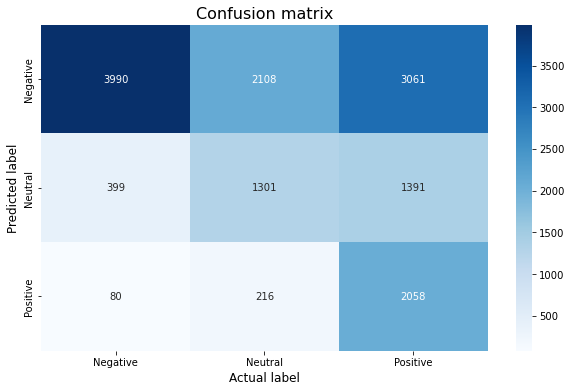

In [139]:
cm = confusion_matrix(tweets['airline_sentiment'], tweets['VaderSentiment'])
# plot confusion matrix 
plt.figure(figsize=(10,6))
sentiment_classes = ['Negative', 'Neutral', 'Positive']
sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
            xticklabels=sentiment_classes,
            yticklabels=sentiment_classes)

plt.title('Confusion matrix', fontsize=16)
plt.xlabel('Actual label', fontsize=12)
plt.ylabel('Predicted label', fontsize=12)
plt.show()


In [140]:
# Analysing the tewwt comments of the Actuals with Sentiment of 1 vs the Predicted with Sentiment of -1
tweets[(tweets['VaderSentiment'] == -1) & (tweets['airline_sentiment'] == 1)][["text", "Original_Text",
                                                                                  "airline_sentiment", "VaderSentiment"]].head(10)

text  \
114                                       come back phl already need take us horrible cold pleasecomeback   
212                                                  twitter team guy kill reschedule soon possible thank   
233                                     airline base silicon valley disruption fcmostinnovative incubator   
362                                                               course work obsess entire virgin family   
690                                  kudos cancel flightling flight dfw morning unite usually first panic   
1177                                                                 confirm seat crisis avert beers miss   
1538  want compliment phone agent jeanette reflight book problems rdu sea thru sfo connect flight thru...   
1613                                                              cancel flight flight anytime keep night   
1668                                                                       finally make rep solve problem   
1681                                                                                 nope set thank check   

                                                                                            Original_Text  \
114   @VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #ple...   
212                  @VirginAmerica twitter team. you guys killed it for rescheduling me asap. thank you!   
233   @VirginAmerica, the only airline based in Silicon Valley! #disruption #FCmostinnovative #incubat...   
362   @VirginAmerica of course! I work for @VirginAtlantic and I'm obsessed with the entire Virgin fam...   
690   @united kudos for not Cancelled Flightling flights from DFW this morning.   United usually first...   
1177                             @united just confirmed a seat! Crisis averted! Beers won't be missed now   
1538  @United Wanted to compliment ur phone agent Jeanette for reFlight Booking Problems RDU to SEA th...   
1613  @united can Cancelled Flight my flight anytime if this is where they keep me for the night.. htt...   
1668                                               @united finally made it to rep, who solved my problem.   
1681                                                              @united nope all set. Thx for checking.   

      airline_sentiment  VaderSentiment  
114                   1              -1  
212                   1              -1  
233                   1              -1  
362                   1              -1  
690                   1              -1  
1177                  1              -1  
1538                  1              -1  
1613                  1              -1  
1668                  1              -1  
1681                  1              -1

In [141]:
# Analysing the tewwt comments of the Actuals with Sentiment of 1 vs the Predicted with Sentiment of -1
tweets[(tweets['VaderSentiment'] == 1) & (tweets['airline_sentiment'] == -1)][["text", "Original_Text",
                                                                                  "airline_sentiment", "VaderSentiment"]].head(10)

text  \
17  fly nyc sfo last week could fully sit seat due two large gentleman either side help   
24             guy mess seat reserve seat friends guy give seat away want free internet   
28                      amaze get cold air vent vx noair worstflightever roast sfotobos   
32  help leave expensive headphones flight iad lax today seat one answer l f number lax   
33                   await return phone call would prefer use online selfservice option   
39                                                               chat support work site   
41  hey first time flyer next week excite hard time get flight add elevate account help   
55                hi excite lga dal deal try book since last week page never load thank   
61                                    call weeks ago add flight elevate still show help   
66                                      heyyyy guyyyys try get hour someone call please   

                                                                                          Original_Text  \
17  @VirginAmerica  I flew from NYC to SFO last week and couldn't fully sit in my seat due to two la...   
24  @VirginAmerica you guys messed up my seating.. I reserved seating with my friends and you guys g...   
28  @VirginAmerica amazing to me that we can't get any cold air from the vents. #VX358 #noair #worst...   
32  @VirginAmerica help, left expensive headphones on flight 89 IAD to LAX today. Seat 2A. No one an...   
33  @VirginAmerica awaiting my return phone call, just would prefer to use your online self-service ...   
39                 @VirginAmerica Your chat support is not working on your site: http://t.co/vhp2GtDWPk   
41  @VirginAmerica Hey, first time flyer next week - excited! But I'm having a hard time getting my ...   
55  @VirginAmerica hi! i'm so excited about your $99 LGA-&gt;DAL deal- but i've been trying 2 book s...   
61  @VirginAmerica I called a 3-4 weeks ago about adding 3 flights from 2014 to my Elevate...they st...   
66  @VirginAmerica heyyyy guyyyys.. been trying to get through for an hour. can someone call me plea...   

    airline_sentiment  VaderSentiment  
17                 -1               1  
24                 -1               1  
28                 -1               1  
32                 -1               1  
33                 -1               1  
39                 -1               1  
41                 -1               1  
55                 -1               1  
61                 -1               1  
66                 -1               1

**Inferences:**

- From the above report, we can see that the original sentiment was Positive but the SentimentIntensityAnalyzer has identified it as Negative sentiment. On looking at the text, there is a high possiblity that the tweet was Negative which the TextBlob has identified it correctly
- Similarly, the other way with Original sentiment being Negative and the prediction is Positive. 
- There is also a good number of same sentiments identified for the tweets between actual vs predicted  

<a id='summarymodeling'> </a>

## Summary of the Modeling
*[Click to return to TOC](#summary_home)*



**EDA - Based on Sentiments across Airlines:**

Exploratory anaylsis was done for the various features and also with respect to the Sentiments feature. Also reported the distribution & impact of the various features across each airlines. 


**Data PreProcessing:**

As part of the preparation for the sentiment analysis, following pre processing steps were performed. Used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words

    - Remove html tags.
    - Replace contractions in string. (e.g. replace I'm --> I am) and so on.
    - Remove numbers.
    - Remove URLs.
    - Removal of @Mention
    - Tokenization.
    - Removal of Non Ascii codes
    - Conversion to lowercase
    - Removel of special Characters & Punctuations
    - Remove Stopwords
    - Lemmatized data

    - Word Cloud chart was produced to analyse the sentiments using the processed tweet information
    - Top 15 key words were determined which are part of the respective tweet sentiments
                                       
**Modeling - Sentiment Analysis:**

- ####  Sentiment Analysis using Supervised Learning Methods: 

   - ##### CountVectorizer (Bag of Words)
    
    * Built the models based on CountVectorizer (Bag of Words) and applying Random Forest, Gradient Boosting and Decision Tree classifiers
    * Optimized the RandomForest classifier to determine the optimal threahold
    * Based on the model accuracy calculated for the various models, Random Forest classifier was used to do the prediction and used the confusion matrix to compare the predictions
    * Reported the top 40 words that was used to determine the sentiments

    **Term Frequency(TF) - Inverse Document Frequency(IDF)**
    
    * Built the models based on TfidfVectorizer and applying Random Forest, Gradient Boosting and Decision Tree classifiers
    * Optimized the RandomForest classifier to determine the optimal threahold
    * Based on the model accuracy calculated for the various models, Random Forest classifier was used to do the prediction and used the confusion matrix to compare the predictions
    * Reported the top 40 words that was used to determine the sentiments

- ####  Sentiment Analysis using UnSupervised Learning Methods: 

    **TextBlob**
    
    * Built the models based on TextBlob and calculated the Sentiment polarity of the tweets
    * For the analysis, compared the predictions vs the actuals reported, by generating the confusion matrix  

  **Vader Sentiment**
    
    * Built the models SentimentIntensityAnalyzer and calculated the polarity scores of tweets & used "Compund factor" score
    * For the analysis, compared the predictions vs the actuals reported, by generating the confusion matrix



<a id='recommendations'> </a>

## Recommendations
*[Click to return to TOC](#summary_home)*


Based on the study of the tweets, following are the recommendations

- Almost all the airlines have high number of negative tweets. Its also possible that users tend to tweet more if they have any concers or issues that is not being addressed or if they had a bad experience during the travel using the airlines
- "Customer Service Issue" has been the top most reasons for the negative comments. The respective airlines needs to take measures to improve the Customer services
- "Late Flights", "Flight Delays", "Cancelled Flights" have been the other reasons for the negative comments. Airlines needs to focus on timely operations of their flights without delays or cancellations. The users have to be updated in advance if there is any issues in the flight operations
- The Tweets were more specifically on 22nd - 24th Feb. They can check if there were any major issues which led to the increase in the tweets and do a root cause to address the concerns
- Significant tweets are received during the moring hours between 9-11 when most of the travel happens. Users will be concrned if there is any delays during the moring and probably they were not happy with the impact to their travel & baggage clarance during the morning hours
- Most of the tweets & converns are reported from the EST US timezone. The flight operations & serivce needs to be reviewed in that sector, especially Boston, MA / New York / Washington, DC


---